# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

Описание данных:

+ ***airports_nearest*** — расстояние до ближайшего аэропорта в метрах (м) 
+ ***balcony*** — число балконов 
+ ***ceiling_height*** — высота потолков (м) 
+ ***cityCenters_nearest*** — расстояние до центра города (м) 
+ ***days_exposition*** — сколько дней было размещено объявление (от публикации до снятия)
+ ***first_day_exposition*** — дата публикации
+ ***floor*** — этаж
+ ***floors_total*** — всего этажей в доме
+ ***is_apartment*** — апартаменты (булев тип)
+ ***kitchen_area*** — площадь кухни в квадратных метрах (м²)
+ ***last_price*** — цена на момент снятия с публикации
+ ***living_area*** — жилая площадь в квадратных метрах(м²)
+ ***locality_name*** — название населённого пункта
+ ***open_plan*** — свободная планировка (булев тип)
+ ***parks_around3000*** — число парков в радиусе 3 км
+ ***parks_nearest*** — расстояние до ближайшего парка (м)
+ ***ponds_around3000*** — число водоёмов в радиусе 3 км
+ ***ponds_nearest*** — расстояние до ближайшего водоёма (м)
+ ***rooms*** — число комнат
+ ***studio*** — квартира-студия (булев тип)
+ ***total_area*** — площадь квартиры в квадратных метрах (м²)
+ ***total_images*** — число фотографий квартиры в объявлении

<h1>Шаг 1. Ознакомление с данными<h1>

In [1]:
# импорт необходимых библиотек

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import scipy

import scipy.stats
        
from geopy import distance

import requests as r

import json

import time

import os

import seaborn as sns

import plotly.express as px

import dash

Взглянем на исходные данные

In [2]:
data = pd.read_csv('C:/Users/data.csv')

In [3]:
data.head(20)

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23699 non-null  int64  
 1   total_images          23699 non-null  int64  
 2   last_price            23699 non-null  float64
 3   total_area            23699 non-null  float64
 4   first_day_exposition  23699 non-null  object 
 5   rooms                 23699 non-null  int64  
 6   ceiling_height        14504 non-null  float64
 7   floors_total          23613 non-null  float64
 8   living_area           21796 non-null  float64
 9   floor                 23699 non-null  int64  
 10  is_apartment          2775 non-null   object 
 11  studio                23699 non-null  bool   
 12  open_plan             23699 non-null  bool   
 13  kitchen_area          21421 non-null  float64
 14  balcony               12180 non-null  float64
 15  locality_name      

Видим, что многие столбцы, в том числе и потенциально полезные, к сожалению, содержат уйму пропусков.

<h1>Шаг 2. Предобработка и преобразование данных.<h1>
    
<h1>Обогащение данных.<h1>

<h4>Заполнение столбца 'balcony.'<h4>

Пропуск в столбце 'balcony', вероятно, означает, что балкон в квартире отсутствует. 

In [5]:
data['balcony'].isnull().sum()

11519

Таких пропусков довольно много...

Заполним пропуски в столбце нулями.

In [6]:
data['balcony'] = data['balcony'].fillna(0)

In [7]:
data['balcony'].isnull().sum()

0

<h4>Изучим столбец 'locality_name'.<h4>

Поищем схожие дублирующие именования в названиях населенных пунктов.

In [8]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [9]:
len(data['locality_name'].unique())

365

Заменим букву 'ё' на 'е'.

In [10]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [11]:
len(data['locality_name'].unique())

331

'городской поселок' исправим на 'поселок городского типа'

In [12]:
data['locality_name'] = data['locality_name'].replace(['городской поселок'], 'поселок городского типа', regex=True)

In [13]:
len(data['locality_name'].unique())

324

Удалим словосочетание ' при железнодорожной'

In [14]:
data['locality_name'] = data['locality_name'].replace([' при железнодорожной'], '', regex = True)

In [15]:
len(data['locality_name'].unique())

322

In [16]:
data.duplicated().sum()

0

Также видно, что в некоторых случаях расстояние до центра мало, то есть это самый центр Петербурга, но информация об этом просто упущена.

Срочно исправим это недоразумение!

In [17]:
data[(data['locality_name'].isnull())][['locality_name', 'cityCenters_nearest']]

,locality_name,cityCenters_nearest
1097,NaN,4258.0
2033,NaN,NaN
2603,NaN,17369.0
2632,NaN,17369.0
3574,NaN,8127.0
4151,NaN,3902.0
4189,NaN,3039.0
4670,NaN,5382.0
5343,NaN,9538.0
5707,NaN,16788.0


In [18]:
data['locality_name'].isnull().sum()

49

В радиусе 10 км от центра, очевидно, все еще Петербург, поэтому сделаем отбор именно на основе указанной цифры.

In [19]:
data[(data['locality_name'].isnull()) & (data['cityCenters_nearest'] < 10000)][['locality_name', 'cityCenters_nearest']]

,locality_name,cityCenters_nearest
1097,NaN,4258.0
3574,NaN,8127.0
4151,NaN,3902.0
4189,NaN,3039.0
4670,NaN,5382.0
5343,NaN,9538.0
7114,NaN,8582.0
7330,NaN,4627.0
8568,NaN,4065.0
9821,NaN,3801.0


Заполним пропуски.

In [20]:
data.loc[(data['locality_name'].isnull()) & (data['cityCenters_nearest'] < 10000), 'locality_name'] = data.loc[(data['locality_name'].isnull()) & (data['cityCenters_nearest'] < 10000), 'locality_name'].fillna('Санкт-Петербург')

In [21]:
data['locality_name'].isnull().sum()

24

Такой нехитрой манипуляцией мы заполнили 24 пропуска из 49!

<h4>Пропуски в столбце 'is_apartment'.<h4>

Взглянем на заполненные строки данного столбца.

In [22]:
data[data['is_apartment'].isnull() == False]['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Всего лишь 50 апартаментов в выборке...

Многие люди мало знакомы с термином апартаменты, поэтому и оставили в графе пропуск. 

Поэтому мы смело можем заполнить пропуски значением False.

In [23]:
data.loc[(data['is_apartment'].isnull() == True), 'is_apartment'] = data.loc[(data['is_apartment'].isnull() == True), 'is_apartment'].fillna(False)

Все прошло успешно!

In [24]:
data[data['is_apartment'].isnull() == False]['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Двигаемся дальше!

<h4>Изучим сколько обычно комнат в предлагаемых квартирах.<h4> 

In [25]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Интересно что собой представляют квартиры с нулем комнат!?

In [26]:
data[data['rooms'] == 0]['rooms'].value_counts()

0    197
Name: rooms, dtype: int64

Всего нулькомнатных квартит 197.

Самое очевидное предположение - это студии.

Проверим это.

In [27]:
data[data['studio'] == True][['studio', 'rooms']]

,studio,rooms
144,True,0
440,True,0
608,True,0
697,True,0
716,True,0
...,...,...
22867,True,0
22877,True,0
23210,True,0
23554,True,0


In [28]:
data[data['studio'] == True]['rooms'].value_counts()

0    138
1     11
Name: rooms, dtype: int64

Интересно, что студий в выборке 149 штук, но только 138 из них - нулькомнатные квартиры. Чуть позже определим оставшиеся 11 студий как нулькомнатные.

Может быть в нулькомнатные квартиры входят квартиры с открытой планировкой?

In [29]:
data[data['open_plan'] == True][['open_plan', 'rooms']]

,open_plan,rooms
349,True,0
508,True,0
780,True,0
839,True,0
946,True,0
...,...,...
21299,True,0
21628,True,0
22573,True,0
23442,True,0


In [30]:
data[data['open_plan'] == True]['rooms'].value_counts()

0    59
1     3
3     2
5     1
4     1
2     1
Name: rooms, dtype: int64

In [31]:
data[data['rooms'] == 0]['rooms'].value_counts()[0] == data[data['open_plan'] == True]['rooms'].value_counts()[0] + data[data['studio'] == True]['rooms'].value_counts()[0]

True

Это победа!

Исправим кол - во комнат в студиии на ноль.

In [32]:
data[(data['studio'] == True) & (data['rooms'] == 1)][['studio', 'rooms']]

,studio,rooms
2389,True,1
3187,True,1
4180,True,1
8683,True,1
11026,True,1
12935,True,1
15142,True,1
18732,True,1
20086,True,1
21702,True,1


In [33]:
data.loc[(data['studio'] == True) & (data['rooms'] == 1), 'rooms'] = 0

In [34]:
data[data['rooms'] == 0]['rooms'].value_counts()

0    208
Name: rooms, dtype: int64

In [35]:
data[data['open_plan'] == True]['rooms'].value_counts()[0] + data[data['studio'] == True]['rooms'].value_counts()[0]

208

Все ок.

<h4>Взглянем на столбец 'kitchen_area', в котором довольно много пропусков.<h4>

In [36]:
data['kitchen_area'].isnull().sum()

2278

In [37]:
data[data['studio'] == True][['studio', 'kitchen_area']]

,studio,kitchen_area
144,True,NaN
440,True,NaN
608,True,NaN
697,True,NaN
716,True,NaN
...,...,...
22867,True,NaN
22877,True,NaN
23210,True,NaN
23554,True,NaN


In [38]:
data[data['studio'] == True][['studio', 'kitchen_area']].isnull().sum()

studio            0
kitchen_area    149
dtype: int64

Заполним проруски нулями.

In [39]:
data.loc[data['studio'] == True, 'kitchen_area'] = data.loc[data['studio'] == True, 'kitchen_area'].fillna(0)

Проделаем аналогичную операцию с квартирами с открытой планировкой и нулем комнат.

In [40]:
data[(data['open_plan'] == True) & (data['rooms'] == 0)][['open_plan', 'kitchen_area', 'rooms']]

,open_plan,kitchen_area,rooms
349,True,NaN,0
508,True,NaN,0
780,True,NaN,0
839,True,NaN,0
946,True,NaN,0
1574,True,NaN,0
1625,True,NaN,0
2532,True,NaN,0
3019,True,NaN,0
4115,True,NaN,0


In [41]:
data[(data['open_plan'] == True) & (data['rooms'] == 0)][['open_plan', 'kitchen_area']].isnull().sum()

open_plan        0
kitchen_area    59
dtype: int64

In [42]:
data.loc[(data['open_plan'] == True) & (data['rooms'] == 0), 'kitchen_area'] = data.loc[data['open_plan'] == True, 'kitchen_area'].fillna(0)

In [43]:
data[data['open_plan'] == True]['kitchen_area'].value_counts()

0.0    59
Name: kitchen_area, dtype: int64

Все ок!

<h4>Проверим правильность заполнения столбцов с информацией о парках.<h4>

Допустим, что в столбце 'parks_around3000' строка незаполнена, а соответсвующая ей строка в столбце 'parks_nearest' заполнена.

In [44]:
data[(data['locality_name'] == 'поселок Новый Учхоз')][['parks_around3000', 'parks_nearest', 'locality_name']].isnull().sum()

parks_around3000    6
parks_nearest       6
locality_name       0
dtype: int64

In [45]:
data[data['parks_around3000'].isnull() == True][['parks_around3000', 'parks_nearest']].isnull().sum()

parks_around3000    5518
parks_nearest       5518
dtype: int64

а если наоборот??

In [46]:
data[data['parks_nearest'].isnull() == True][['parks_around3000', 'parks_nearest']].isnull().sum()

parks_around3000     5518
parks_nearest       15620
dtype: int64

Здесь становится интересней... Проверим!

In [47]:
data[data['parks_nearest'].isnull() == True][['parks_around3000', 'parks_nearest']]

,parks_around3000,parks_nearest
1,0.0,NaN
5,NaN,NaN
6,0.0,NaN
7,0.0,NaN
8,NaN,NaN
...,...,...
23691,0.0,NaN
23692,NaN,NaN
23695,NaN,NaN
23696,NaN,NaN


Логично. Если информация о расстоянии до парка отсутствует, то можно установить 0, а можно NaN.

Отберем строки, где в столбце 'parks_around3000' стоит не ноль и не NaN.

In [48]:
data[(data['parks_nearest'].isnull() == True) & ((data['parks_around3000'] != 0) & (data['parks_around3000'].isnull() != True))][['parks_around3000', 'parks_nearest']]

,parks_around3000,parks_nearest


Собственно, все хорошо, так и должно быть.

Еще одна интересная проверка. Все ок!

In [49]:
data[(data['parks_around3000'] == 0) & (data['parks_nearest'].isnull() == False)][['parks_around3000', 'parks_nearest']]

,parks_around3000,parks_nearest
1590,0.0,3064.0
10959,0.0,3190.0
19208,0.0,3013.0
19430,0.0,3190.0


<h4>Теперь проверим правильность заполнения столбцов с информацией о прудах.<h4>

Забавно, что количество незаполненных данных о прудах и о парках одинаково...

In [50]:
data[data['ponds_around3000'].isnull() == True][['ponds_around3000', 'ponds_nearest']].isnull().sum()

ponds_around3000    5518
ponds_nearest       5518
dtype: int64

In [51]:
data[data['ponds_nearest'].isnull() == True][['ponds_around3000', 'ponds_nearest']].isnull().sum()

ponds_around3000     5518
ponds_nearest       14589
dtype: int64

In [52]:
data[(data['ponds_nearest'].isnull() == True) & ((data['ponds_around3000'] != 0) & (data['ponds_around3000'].isnull() != True))][['ponds_around3000', 'ponds_nearest']]

,ponds_around3000,ponds_nearest


Здесь тоже все ок.

Вернемся к мысли об одинаковом количестве незаполненных строк о прудах и парках.

In [53]:
data[data['parks_around3000'].isnull() == True][['ponds_around3000', 'ponds_nearest', 'parks_around3000', 'parks_nearest']].isnull().sum()

ponds_around3000    5518
ponds_nearest       5518
parks_around3000    5518
parks_nearest       5518
dtype: int64

In [54]:
data[data['ponds_around3000'].isnull() == True][['ponds_around3000', 'ponds_nearest', 'parks_around3000', 'parks_nearest']].isnull().sum()

ponds_around3000    5518
ponds_nearest       5518
parks_around3000    5518
parks_nearest       5518
dtype: int64

Выглядит любопытно... 

Интересно взглянуть на заполняемость этих данных по Петербургу и Лен. области. 

Пруды в Петербурге:

In [55]:
data[(data['parks_around3000'].isnull() == True) &(data['locality_name'] == 'Санкт-Петербург')][['parks_around3000', 'parks_nearest', 'locality_name']]

,parks_around3000,parks_nearest,locality_name
81,NaN,NaN,Санкт-Петербург
593,NaN,NaN,Санкт-Петербург
604,NaN,NaN,Санкт-Петербург
742,NaN,NaN,Санкт-Петербург
795,NaN,NaN,Санкт-Петербург
...,...,...,...
21668,NaN,NaN,Санкт-Петербург
21881,NaN,NaN,Санкт-Петербург
21955,NaN,NaN,Санкт-Петербург
22554,NaN,NaN,Санкт-Петербург


Парки в Петербурге:

In [56]:
data[(data['ponds_around3000'].isnull() == True) &(data['locality_name'] == 'Санкт-Петербург')][['ponds_around3000', 'ponds_nearest', 'locality_name']]

,ponds_around3000,ponds_nearest,locality_name
81,NaN,NaN,Санкт-Петербург
593,NaN,NaN,Санкт-Петербург
604,NaN,NaN,Санкт-Петербург
742,NaN,NaN,Санкт-Петербург
795,NaN,NaN,Санкт-Петербург
...,...,...,...
21668,NaN,NaN,Санкт-Петербург
21881,NaN,NaN,Санкт-Петербург
21955,NaN,NaN,Санкт-Петербург
22554,NaN,NaN,Санкт-Петербург


И пруды, и парки в Петербурге:

In [57]:
data[(data['ponds_around3000'].isnull() == True) & (data['parks_around3000'].isnull() == True) &(data['locality_name'] == 'Санкт-Петербург')][['ponds_around3000', 'ponds_nearest','parks_around3000', 'parks_nearest', 'locality_name', 'cityCenters_nearest', 'airports_nearest']].isnull().sum()

ponds_around3000       61
ponds_nearest          61
parks_around3000       61
parks_nearest          61
locality_name           0
cityCenters_nearest    61
airports_nearest       61
dtype: int64

Видим, что лишь 61 строка не заполнена. Любопытно, что столбцы 'cityCenters_nearest' и 'airports_nearest' также незаполнены.

Все остальные незаполненные строки относятся к недвижке в области.

Парки в Лен. области:

In [58]:
data[(data['parks_around3000'].isnull() == True) &(data['locality_name'] != 'Санкт-Петербург')][['parks_around3000', 'parks_nearest', 'locality_name']]

,parks_around3000,parks_nearest,locality_name
5,NaN,NaN,поселок городского типа Янино-1
8,NaN,NaN,поселок Мурино
12,NaN,NaN,Сертолово
22,NaN,NaN,деревня Кудрово
30,NaN,NaN,Коммунар
...,...,...,...
23683,NaN,NaN,поселок Дзержинского
23692,NaN,NaN,Тихвин
23695,NaN,NaN,Тосно
23696,NaN,NaN,село Рождествено


Пруды в Лен. области:

In [59]:
data[(data['ponds_around3000'].isnull() == True) &(data['locality_name'] != 'Санкт-Петербург')][['ponds_around3000', 'ponds_nearest', 'locality_name']]

,ponds_around3000,ponds_nearest,locality_name
5,NaN,NaN,поселок городского типа Янино-1
8,NaN,NaN,поселок Мурино
12,NaN,NaN,Сертолово
22,NaN,NaN,деревня Кудрово
30,NaN,NaN,Коммунар
...,...,...,...
23683,NaN,NaN,поселок Дзержинского
23692,NaN,NaN,Тихвин
23695,NaN,NaN,Тосно
23696,NaN,NaN,село Рождествено


Парки и пруды в Лен. области:

In [60]:
data[(data['ponds_around3000'].isnull() == True) & (data['parks_around3000'].isnull() == True) &(data['locality_name'] != 'Санкт-Петербург')][['ponds_around3000', 'ponds_nearest','parks_around3000', 'parks_nearest', 'locality_name', 'cityCenters_nearest', 'airports_nearest']].isnull().sum()

ponds_around3000       5457
ponds_nearest          5457
parks_around3000       5457
parks_nearest          5457
locality_name             8
cityCenters_nearest    5457
airports_nearest       5457
dtype: int64

Вглянем на табличку. Незаполненные данные о прудах и парках коррелируют с незаполненностью столбцов 'cityCenters_nearest' и

'airports_nearest'. Видимо, данные о прудах и парках заполнялись не людьми, а сотрудниками Яндекса.

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23699 non-null  int64  
 1   total_images          23699 non-null  int64  
 2   last_price            23699 non-null  float64
 3   total_area            23699 non-null  float64
 4   first_day_exposition  23699 non-null  object 
 5   rooms                 23699 non-null  int64  
 6   ceiling_height        14504 non-null  float64
 7   floors_total          23613 non-null  float64
 8   living_area           21796 non-null  float64
 9   floor                 23699 non-null  int64  
 10  is_apartment          23699 non-null  object 
 11  studio                23699 non-null  bool   
 12  open_plan             23699 non-null  bool   
 13  kitchen_area          21629 non-null  float64
 14  balcony               23699 non-null  float64
 15  locality_name      

In [62]:
23699 - (5457 + 61) 

18181

Сумма в скобках - сумма незаполненных сток в столбцах о парках и прудах, а число 23699 - общее кол-во строк. 

Получившееся значение точно совпадает с числом заполненных сток в 'airports_nearest' и 'cityCenters_nearest'.

На самом деле заполнить пропуски о прудах и парках для Ленинградской области можно довольно просто. Для этого можно ипользовать API "Поиск по организациям" карт Яндекс (нужно искать пруды и парки в городах Ленинградской области, которые есть в DataFrame). К сожалению, использование этого продукта платное.

Проверить наличие прудов и парков в Петербурге можно с использованием адресов домов (по понятным причинам данная информация не предоставлена).

Но все-таки кое - что сделать можно.

Мы можем вычислить расстояние до центра Петербурга и до аэропорта для городов Ленинградской области (продуктом Геокодер можно пользоваться бесплатно, но с некоторыми ограничениями).

Расстояние будет неточным, но, как мне кажется, такая неточность не повлияет на коачество модели по предсказанию цены квартиры.

Создадим set из городов, координаты которых неизвестны.

<h5>Парсинг данных<h5>

In [63]:
town_names_city_centers = set(data[(data['cityCenters_nearest'].isnull()) & (data['locality_name'] != 'Санкт-Петербург') & (data['locality_name'].isnull() == False)]['locality_name'].unique())

In [64]:
len(town_names_city_centers)

302

In [65]:
town_names_airports_nearest = set(data[(data['airports_nearest'].isnull()) & (data['locality_name'] != 'Санкт-Петербург') & (data['locality_name'].isnull() == False)]['locality_name'].unique())

In [66]:
len(town_names_airports_nearest)

301

In [67]:
total_cities = town_names_city_centers | town_names_airports_nearest

In [68]:
len(total_cities)

302

Подгузим ключ для API

In [69]:
my_key = open("C:/Java/API_key_yandex_maps.txt", "r").read()

Реализуем функцию по парсингу координат

In [70]:
def get_city_coordinates(city_list, base_url):
    
    coordinates = {}
    
    for city in city_list:
        
        if city == '':
            
            continue
        
        try:
            
            URL = base_url + my_key + '&geocode='+ 'Ленинградская область' + city
            
            response = r.get(URL).json()
            
            # To avoid mistakes in the data (for example, incorrect settlement name), we check name of settlement.
            # If name are equal to Lenigrag region, coordinates are incorrect.
            
            name = response['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['name']
            
            if name != 'Ленинградская область':
                
                data = response['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point'].get('pos')
                
                coordinate = (float(data.split()[1]), float(data.split()[0]))
                
                coordinates[city] = coordinate
            
        except:
            
            coordinates[city] = ''
            
        time.sleep(1)
            
    return coordinates

Запустим парсинг...

In [71]:
#base_URL = 'https://geocode-maps.yandex.ru/1.x/?format=json&apikey='

#town_list = list(total_cities)

#dict_coordinates = get_city_coordinates(town_list, base_URL)

#print(dict_coordinates)

Сохраним полученные данные

In [72]:
#settelments = json.dumps(dict_coordinates)

#with open("settelments.json", "w") as my_file:
    
    #my_file.write(settelments)

Отдельно запарсим координаты Петербурга и аэропорта Пулково и сохраним полученные данные

In [73]:
#base_URL = 'https://geocode-maps.yandex.ru/1.x/?format=json&apikey='

#town_list = ['Санкт-Петербург', 'аэропорт Пулково']

#Peterburg_coordinates = get_city_coordinates(town_list, base_URL)

#print(Peterburg_coordinates)

#Peterburg_settelments = json.dumps(Peterburg_coordinates)

#with open("Peterburg_settelments.json", "w") as my_file:
    
    #my_file.write(Peterburg_settelments)

ЗДЕСЬ МОЖНО ПРОСТО ПОДГРУЗИТЬ ПОЛУЧЕННЫЕ ДАННЫЕ

In [74]:
def read_json(name):
    
    with open(str(name) + ".json", "r") as my_file:
        
        info = my_file.read()
    
    data = json.loads(info)
    
    return data

In [75]:
settelments = read_json('settelments')

Peterburg_coordinates = read_json('Peterburg_settelments')

In [76]:
print(Peterburg_coordinates)

{'Санкт-Петербург': [59.938676, 30.314494], 'аэропорт Пулково': [59.799774, 30.273036]}


In [77]:
dictionary_distance_center = {}

Peterburg_coor = Peterburg_coordinates['Санкт-Петербург']

for key, value in settelments.items():
    
    dictionary_distance_center[key] = distance.distance(value, Peterburg_coor).m
    
dictionary_distance_airport = {}

airport_coor = Peterburg_coordinates['аэропорт Пулково']

for key, value in settelments.items():
    
    dictionary_distance_airport[key] = distance.distance(value, airport_coor).m

Заполняем пропуски в 'cityCenters_nearest'

In [78]:
data.loc[data['cityCenters_nearest'].isnull(), 'cityCenters_nearest'] = data['locality_name'].map(dictionary_distance_center)

Заполняем пропуски в ''airports_nearest'

In [79]:
data.loc[data['airports_nearest'].isnull(), 'airports_nearest'] = data['locality_name'].map(dictionary_distance_airport)

это успех!

In [80]:
data[data['cityCenters_nearest'].isnull() == True][['locality_name', 'cityCenters_nearest']]

,locality_name,cityCenters_nearest
81,Санкт-Петербург,NaN
593,Санкт-Петербург,NaN
604,Санкт-Петербург,NaN
742,Санкт-Петербург,NaN
795,Санкт-Петербург,NaN
...,...,...
21898,NaN,NaN
21955,Санкт-Петербург,NaN
22554,Санкт-Петербург,NaN
22628,Санкт-Петербург,NaN


In [81]:
data[data['cityCenters_nearest'].isnull() == True]['locality_name'].value_counts()

Санкт-Петербург       61
поселок Жилпоселок     1
Name: locality_name, dtype: int64

In [82]:
data[data['cityCenters_nearest'].isnull() == True]['locality_name'].isnull().sum()

8

<h4>Зайдемся изменением типов данных по столбцам.<h4>

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23699 non-null  int64  
 1   total_images          23699 non-null  int64  
 2   last_price            23699 non-null  float64
 3   total_area            23699 non-null  float64
 4   first_day_exposition  23699 non-null  object 
 5   rooms                 23699 non-null  int64  
 6   ceiling_height        14504 non-null  float64
 7   floors_total          23613 non-null  float64
 8   living_area           21796 non-null  float64
 9   floor                 23699 non-null  int64  
 10  is_apartment          23699 non-null  object 
 11  studio                23699 non-null  bool   
 12  open_plan             23699 non-null  bool   
 13  kitchen_area          21629 non-null  float64
 14  balcony               23699 non-null  float64
 15  locality_name      

Изменим следующие столбцы:

+ total_imges - на int

+ last_price - на int

+ total_area - округляем до первого знака после запятой float

+ first_day_exposition  - в datetime

+ ceiling_height - - округляем до первого знака после запятой float

+ floors_total  - на int

+ living_area - округляем до первого знака после запятой float

+ floor - на int

+ is_apartment  - на bool

+ kitchen_area - округляем до первого знака после запятой float

+ balcony  - на int

+ airports_nearest  - так как расстояние в метрах, то можно на int

+ cityCenters_nearest - так как расстояние в метрах, то можно на int

+ parks_nearest - так как расстояние в метрах, то можно на int

+ ponds_nearest - так как расстояние в метрах, то можно на int

+ ponds_around3000  - на int

+ parks_around3000  - на int

+ days_exposition  - на int

Создадим словарь с названиями столбцов и соответствующим им типом преобразования.

In [221]:
int_columns_dict = {'total_images': 'int64', 'last_price': 'int64', 'first_day_exposition': 'datetime64[ns]',
                    
                    'rooms': 'int64', 'floors_total': 'int64', 'floor': 'int64', 'is_apartment': 'bool',  
                    
                    'balcony': 'int64', 'airports_nearest': 'int64', 'cityCenters_nearest': 'int64', 
                    
                    'parks_nearest': 'int64', 'ponds_nearest': 'int64', 'ponds_around3000': 'int64', 
                    
                    'parks_around3000': 'int64','days_exposition': 'int64'}

In [222]:
data = data.astype(int_columns_dict, errors='ignore') #'datetime64[ns]'

Окгруглим значения в столбцах 'total_area', 'living_area', 'kitchen_area' и 'ceiling_height' до одного знака после запятой.

In [223]:
data['total_area'] = data[data['total_area'].notnull()]['total_area'].round(1)

In [224]:
data['living_area'] = data[data['living_area'].notnull()]['living_area'].round(1)

In [225]:
data['kitchen_area'] = data[data['kitchen_area'].notnull()]['kitchen_area'].round(1)

In [226]:
data['ceiling_height']  = data[data['ceiling_height'].notnull()]['ceiling_height'].round(1)

Проверяем...

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              23699 non-null  int64         
 1   total_images            23699 non-null  int64         
 2   last_price              23699 non-null  int64         
 3   total_area              23699 non-null  float64       
 4   first_day_exposition    23699 non-null  datetime64[ns]
 5   rooms                   23699 non-null  int64         
 6   ceiling_height          14504 non-null  float64       
 7   floors_total            23613 non-null  float64       
 8   living_area             21796 non-null  float64       
 9   floor                   23699 non-null  int64         
 10  is_apartment            23699 non-null  bool          
 11  studio                  23699 non-null  bool          
 12  open_plan               23699 non-null  bool  

Все прошло успешно.

<h3>Создадим новые столбцы, которые понадобятся в дальнейшем.<h3>

<h5>Создадим столбцы с индексом дня и его названием.<h5>

In [91]:
data['day_index'] = data['first_day_exposition'].dt.weekday

data['day_name'] = data['first_day_exposition'].dt.day_name(locale = 'ru')

Аналогичные действия проделаем с месяцем.

In [92]:
data['month_index'] = data['first_day_exposition'].dt.month

data['month_name'] = data['first_day_exposition'].dt.month_name(locale = 'ru')

И, наконец, с годом.

In [93]:
data['year'] = data['first_day_exposition'].dt.year

<h5>Создадим столбец, содержащий категориальную переменную, классифицирующую этаж квартиры.<h5>

Реализуем функцию для классификации

In [94]:
def floor_classifier(floor, floors_total):
    
    if floor == 1:
        
        return 'первый'
    
    elif floor == floors_total:
        
        return 'последний'
    
    else:
        
        return 'иной'

Создаем столбец

In [95]:
data['floor_class'] = data[(data['floor'].isnull() == False) & (data['floors_total'].isnull() == False)][['floor', 'floors_total']].apply(lambda row: floor_classifier(row['floor'], row['floors_total']), axis = 1)

In [96]:
data['floor_class'].value_counts()

иной         17363
последний     3336
первый        2914
Name: floor_class, dtype: int64

<h5>Рассчитаем стоимость квадратного метра для каждой квартиры и сохраним результаты в соответствующем столбце.<h5>

In [97]:
data['price per square meter'] = data[['last_price', 'total_area']].apply(lambda row: round((row['last_price'] / row['total_area']), 1), axis = 1)

Создадим столбец с ценами на квартиры, выраженные в тыс. рублей.

In [98]:
 data['price'] = data['last_price'].apply(lambda x: x/ 10**3)

Создадим столбец с расстоянием до до центра, выраженный в километрах.

In [99]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'].apply(lambda x: float(round(x / 10**3, 0)) if isinstance(x, (float, int)) == True else np.NaN)

<h1>Шаг 3. Анализ данных.<h1>

<h3>Задача 1.<h3> 

<h4>1.1. Изучение следующих параметров: площади, цены, числа комнат и высот потолков.<h4>

In [100]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,14504.000000
mean,60.348635,6.541549e+06,2.070172,2.775717
std,35.654086,1.088701e+07,1.079081,1.260951
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.500000
50%,52.000000,4.650000e+06,2.000000,2.600000
75%,69.900000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


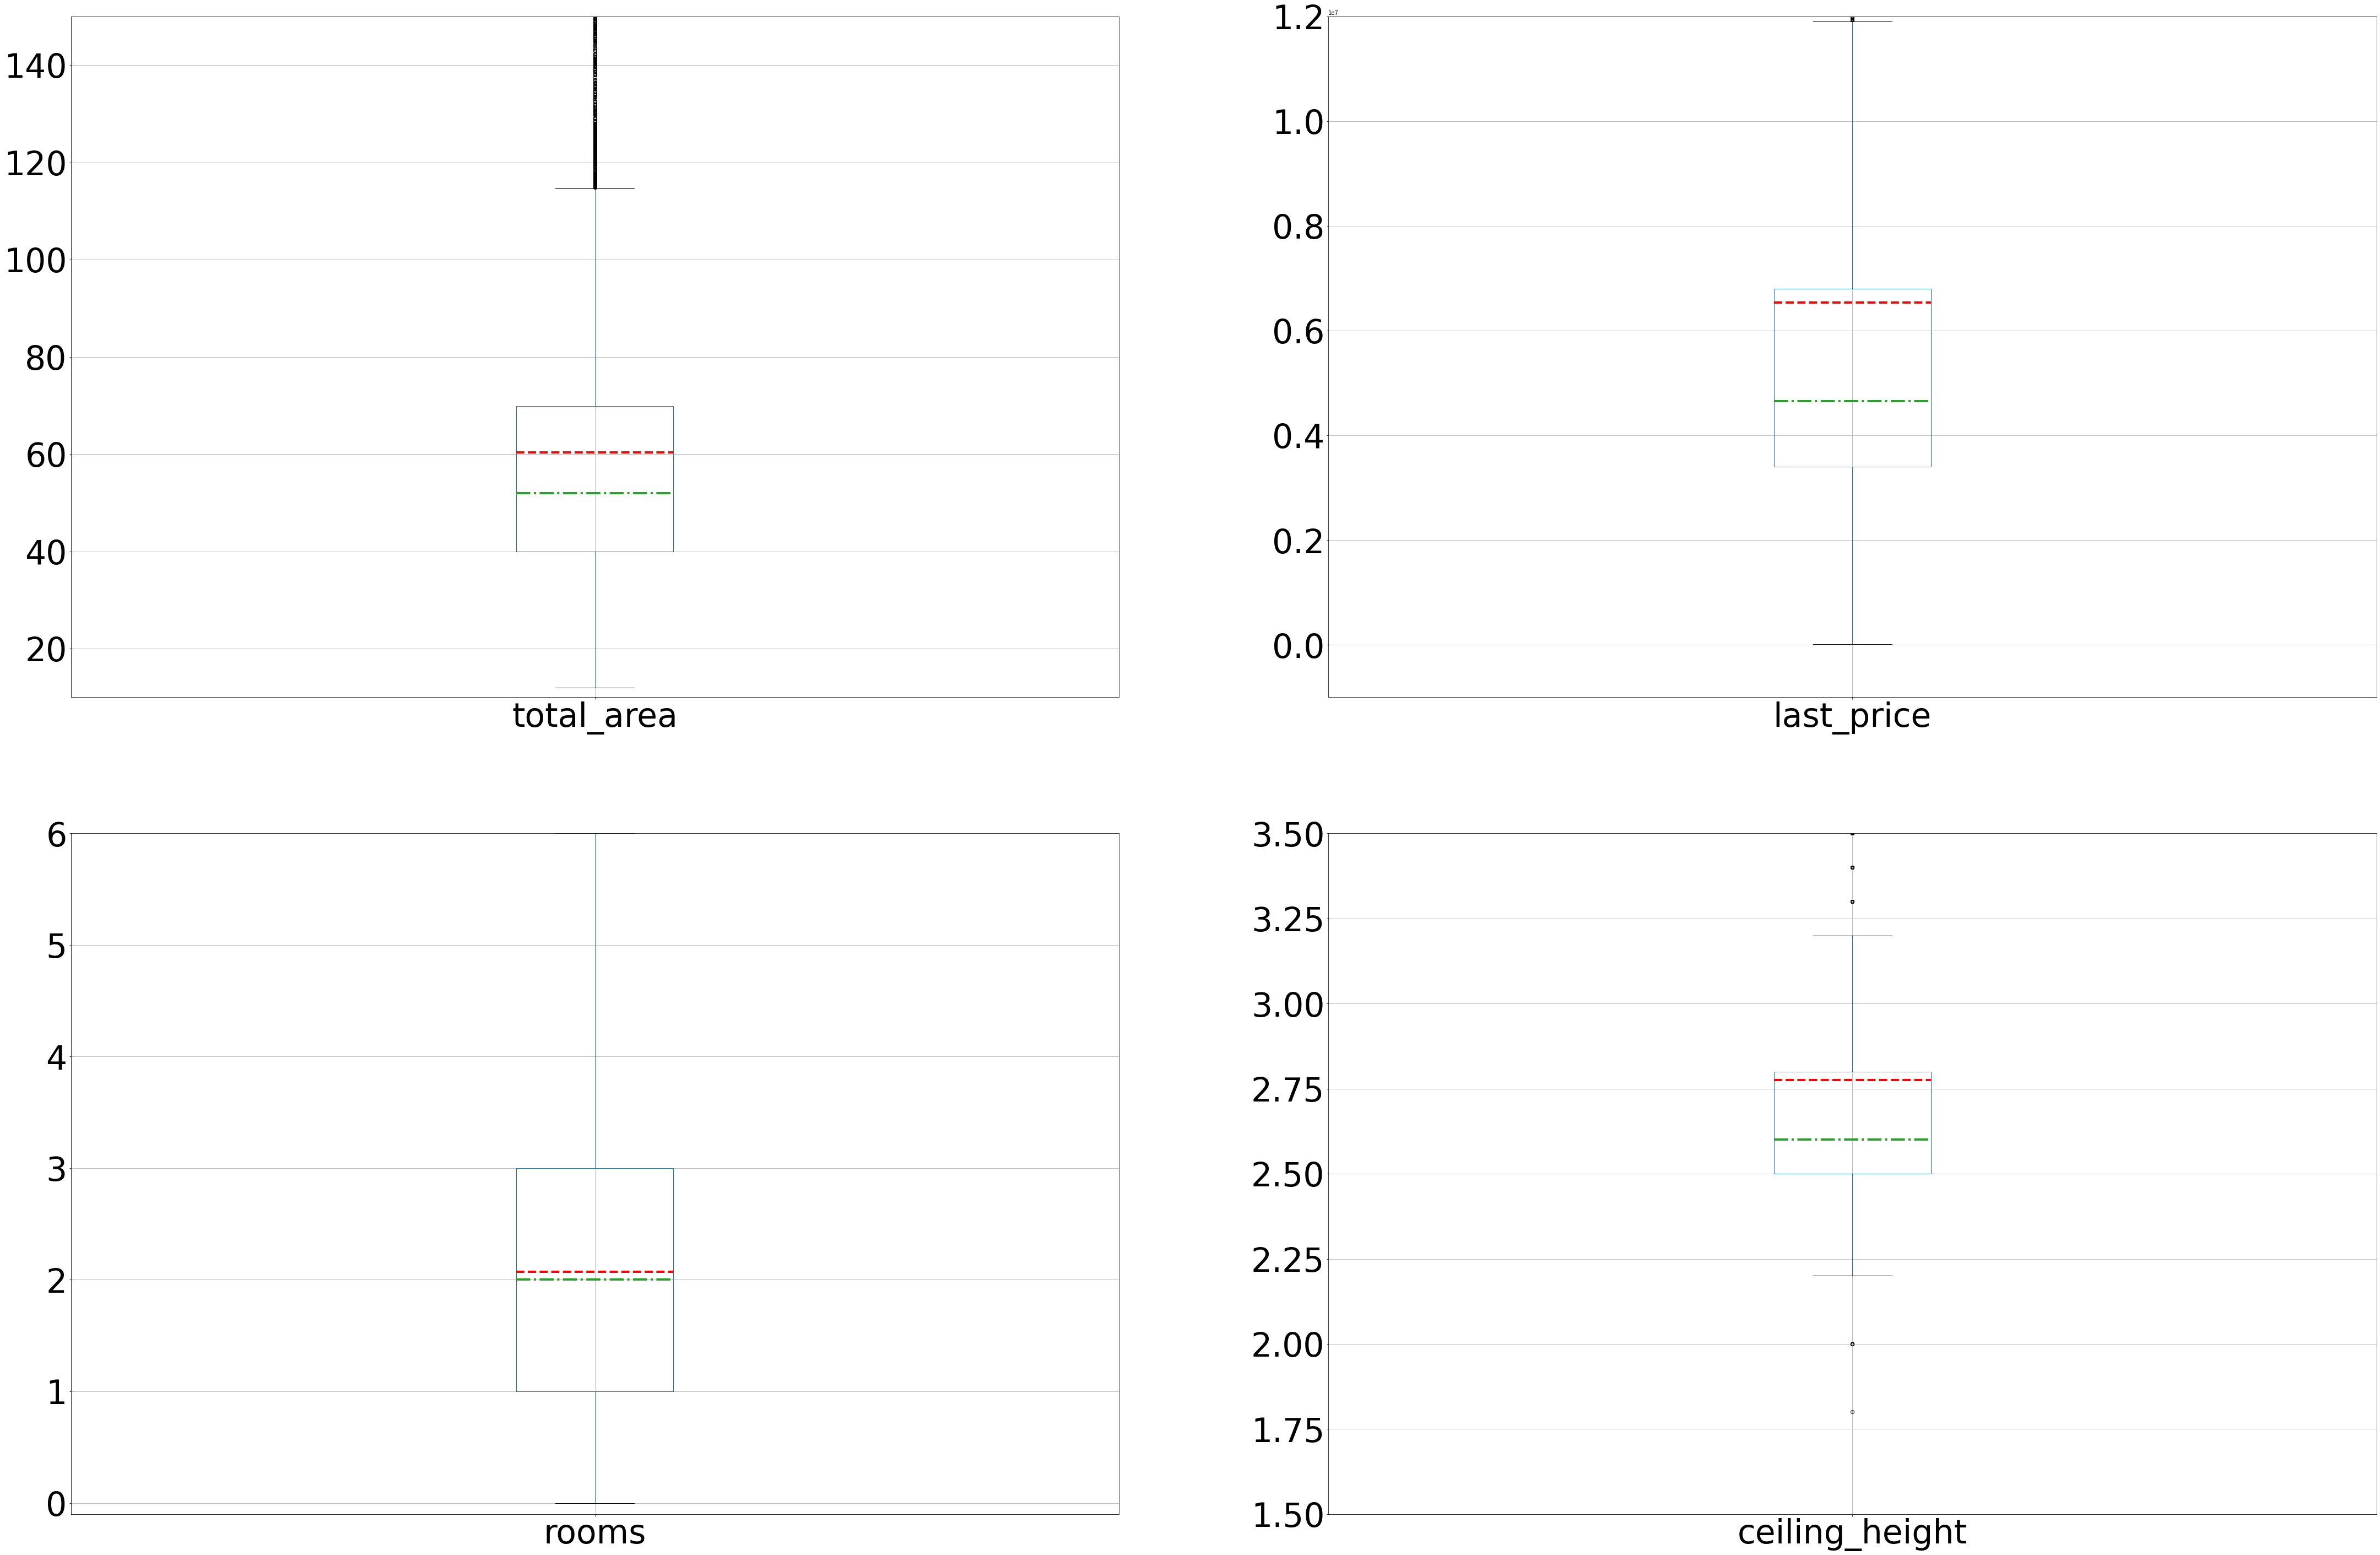

In [317]:
rows = 2; columns = 2

fig, axes = plt.subplots(rows, columns, figsize=(75,50))

column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']

ylims = [[10, 150], [-1000000, 12000000], [-0.1,6], [1.5,3.5]]

meanlineprops = dict(linestyle='--', linewidth = 4.0, color='red') # mean line parameters

medianlineprops = dict(linestyle='-.', linewidth = 4.0, color='blue') # median line parameters

count = 0

for row in range(rows):
    
    for column in range(columns):
        
        data.boxplot(column=column_list[count], ax=axes[row,column], fontsize=60, meanline = True, showmeans = True, meanprops = meanlineprops, medianprops = medianlineprops)
        
        axes[row, column].set_ylim([ylims[count][0], ylims[count][1]])
        
        count += 1

Предварительный анализ дает следующие резульзаты:

+ Площадь. В данных имеется как квартира 12 кв.м., так и 900 кв.м. Cреднее значение (примерно 60 квадратных метров) при этом выглядит более и менее адекватно. Дипазон значений лежит в области от 10 до 115 кв.м; остальное будем воспринимать как выбросы.

+ Цена крартиры. В наличии варианты и за 12 тысяч рублей, а есть и за 763 млн.

+ Комнатность квартиры. От 0 (студия или открытая планировка) до 19 комнат. Варианты с квартирами, в которых имеется от 6 и более комтнат, не надо брать в расчет.

+ Высота потолков - от 1 до 100 метров. Среднее значение выглядит здраво. В расчет возьмем диапазон значений от 2.15 до 3.3 метров.

<h4>1.2. Построение гистограмм для каждого параметра.<h4>

Разобьем все квартиры, представленные в DataFrame, по количеству комнат и создадим новый DataFrame.

Создадим словарь, из которого затем соорудим DataFrame.

In [328]:
 rooms_dictribution = {'rooms': list(data.groupby('rooms').size().index), 'flat_number': list(data.groupby('rooms').size().values)}

In [329]:
pd_rooms_dictribution = pd.DataFrame(rooms_dictribution)

Добавим дополнительный столбец.

In [345]:
def str_rooms_name(room_name):
        
    if room_name == 0:
        
        return 'студии\nапартаменты'
    
    else: 
        
        return str(room_name) + ' комн.'

In [346]:
pd_rooms_dictribution['string_rooms_name'] = pd_rooms_dictribution['rooms'].apply(lambda x: str_rooms_name(x))

Итоговый DataFrame.

In [347]:
pd_rooms_dictribution

,rooms,flat_number,string_rooms_name
0,0,208,студии\nапартаменты
1,1,8036,1 комн.
2,2,7940,2 комн.
3,3,5814,3 комн.
4,4,1180,4 комн.
5,5,326,5 комн.
6,6,105,6 комн.
7,7,59,7 комн.
8,8,12,8 комн.
9,9,8,9 комн.


In [348]:
def make_autopct(pct, total):
    
    value = int(round(pct*total/100.0, 1))
    
    if value >= 5000:
        
        return '{p:.2f}%\n  ({v:d} шт.)'.format(p = pct, v = value)
    
    elif value > 1000:
        
        return "{:.0f}%\n".format(pct)
        
    return ''

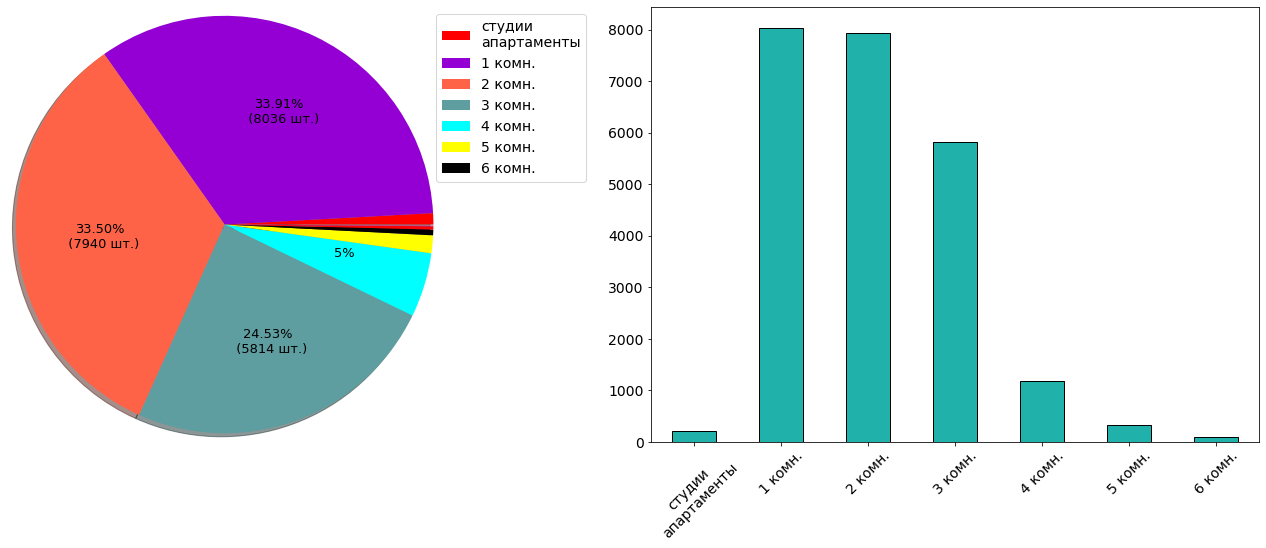

In [349]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))


pd_rooms_dictribution.plot(kind = 'pie', y = 'flat_number', ax = ax[0], radius = 1.2, shadow = True, 
                           autopct = lambda pct: make_autopct(pct, pd_rooms_dictribution['flat_number'].sum()), 
                           fontsize = 13, labels = None,
                           colors=['red', 'darkviolet', 'tomato', 'cadetblue', 'aqua','yellow', 'black'])

ax[0].legend(pd_rooms_dictribution[pd_rooms_dictribution['rooms'] <= 6]['string_rooms_name'].to_numpy(), 
              bbox_to_anchor=(0.97,1.0), prop={'size':14})

ax[0].set_ylabel('')

pd_rooms_dictribution[pd_rooms_dictribution['rooms'] <= 6].plot(kind = 'bar',
                                                                x = 'string_rooms_name', y = 'flat_number', 
                                                                ax = ax[1],  legend = None, rot = 45, 
                                                                ec = 'black', color = 'lightseagreen', fontsize = 14)

plt.gca().xaxis.label.set_visible(False)

#ax[1].patch.set_alpha(0.0)

#ax[1].set_facecolor('white')


Text(0, 0.5, '')

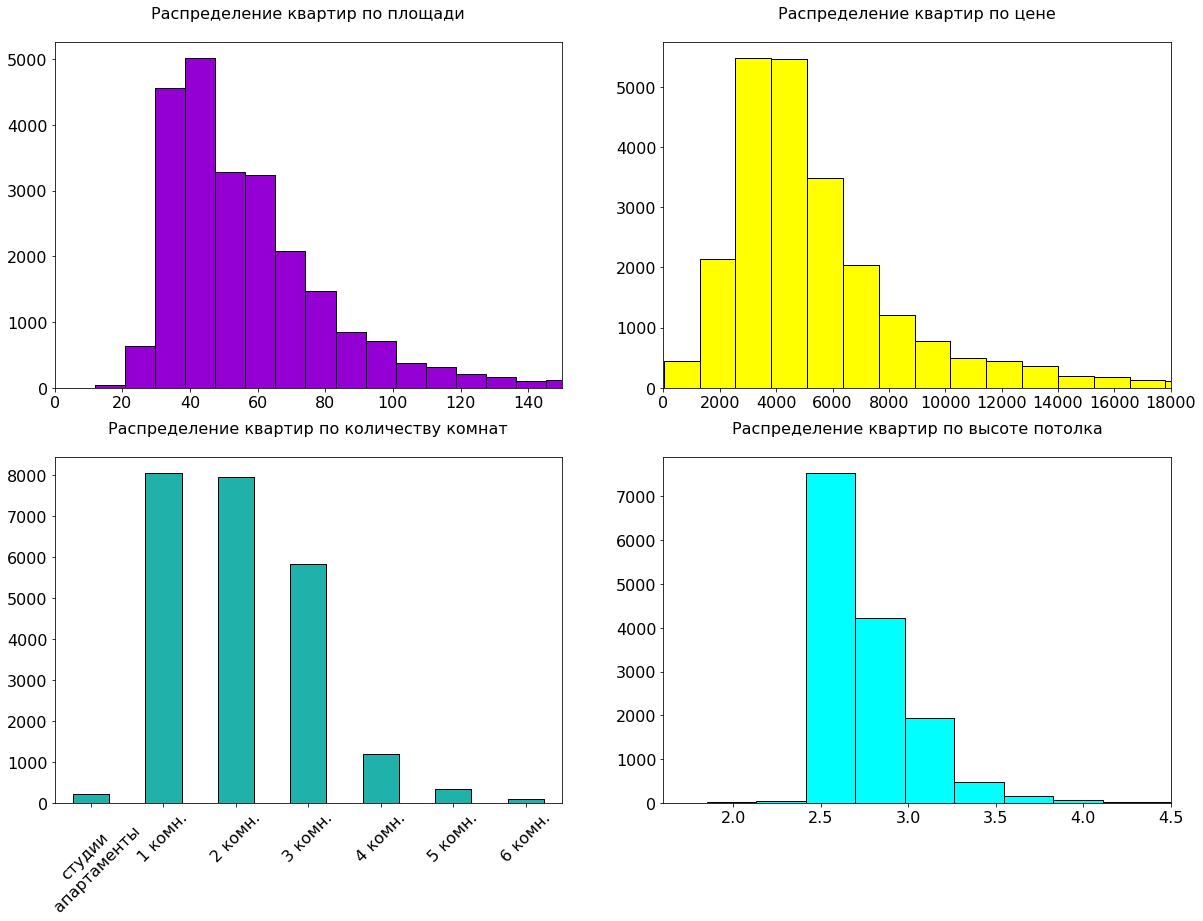

In [352]:
fig, axes = plt.subplots(2, 2, figsize=(20,14))

data['total_area'].plot(kind = 'hist', bins = 100, 
                        ax = axes[0, 0], ec = 'black', 
                        color = 'darkviolet', fontsize = 16)


data['price'].plot(kind = 'hist', bins = 600,
                        ax = axes[0, 1], ec = 'black', 
                        color = 'yellow', fontsize = 16)

pd_rooms_dictribution[pd_rooms_dictribution['rooms'] <= 6].plot(kind = 'bar',
                                                                x = 'string_rooms_name', y = 'flat_number', 
                                                                ax = axes[1, 0],  legend = None, rot = 45, ec = 'black', 
                                                                color = 'lightseagreen', fontsize = 16)

data['ceiling_height'].plot(kind = 'hist', bins = 350, 
                        ax = axes[1, 1], ec = 'black',  
                        color = 'aqua', fontsize = 16)

axes[0, 0].set_xlim([0, 150]); axes[0, 0].set_title('Распределение квартир по площади\n', fontsize = 16)

axes[0, 1].set_xlim([0, 18000]); axes[0, 1].set_title('Распределение квартир по цене\n', fontsize = 16)

axes[1, 1].set_xlim([1.6, 4.5]); axes[1, 0].set_title('Распределение квартир по количеству комнат\n', fontsize = 16)

axes[1, 1].set_title('Распределение квартир по высоте потолка\n', fontsize = 16)

axes[1, 0].set_xlabel(''); axes[0, 0].set_ylabel(''); axes[0, 1].set_ylabel(''); axes[1, 1].set_ylabel('')

* Площадь квартиры. Средняя площадь квартиры - 60 метров квадратных. Площадь больше половины квартир, представленных на рынке, находится в диапазоне от 30 до 80 метров квадратных.

* Цена. Большая часть увартир продается по цене от 2 до 8 млн рублей. При чем имеется существенный "хвост" в области высоких цен.

* Кол-во комнат. Почти 92% процента рынка занимают одно-, двух- или трехкомнатные квартиры. Еще 5% "съедают" квартиры с четырьмя комнатами. На оставшиеся 3% приходятся студии, апартаменты и многокомнатные квартиры.

* Высота потолка. Средняя высота потолка - 2.7 м. В подавляющем числе квартир высота составляет 2.5 до 3.5 метров.

<h3>Задача 2. Изучение времени продажи квартиры.<h3>

Строим гистограмму. Считаем среднее и медиану. Описываем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Взглянем на основные описательные статистики.

In [506]:
data['days_exposition'].describe().to_frame()

,days_exposition
count,20518.000000
mean,180.888634
std,219.727988
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


В среднем, продажа квартиры занимает 180 дней, то еть полгода. Медианное значение равно 95 дням. При этом есть как аномальные быстрые продажи (за один день), так и аномально долгие (1580 дней).

Построим "ящик с усами".

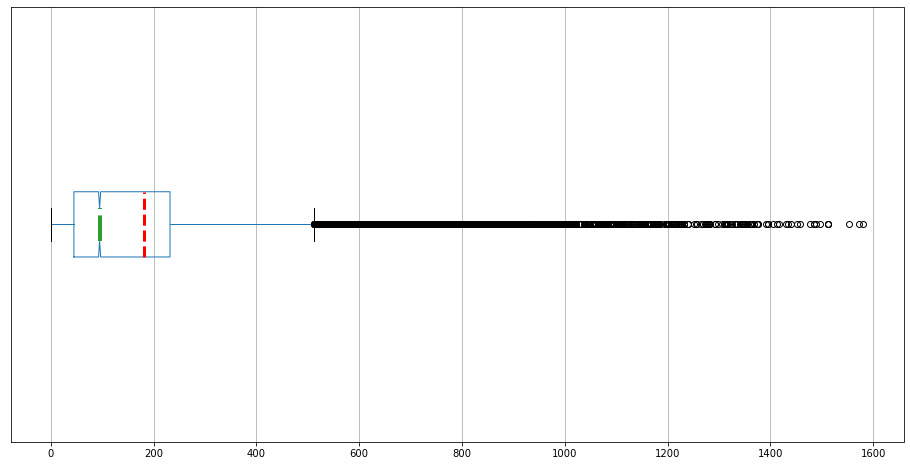

In [707]:
fig, ax = plt.subplots(figsize = (16,8))

meanlineprops = dict(linestyle='--', linewidth = 3.0, color='red') # mean line parameters

medianlineprops = dict(linestyle='-.', linewidth = 4.0, color='green') # median line parameters

data.boxplot(column = 'days_exposition', figsize = (14,7), meanline = True, showmeans = True, vert = False, meanprops = meanlineprops, medianprops = medianlineprops, notch=True)

plt.gca().yaxis.set_visible(False)

Видим просто огромное количество выбросов. Ограничим ось x от 0 до 550.

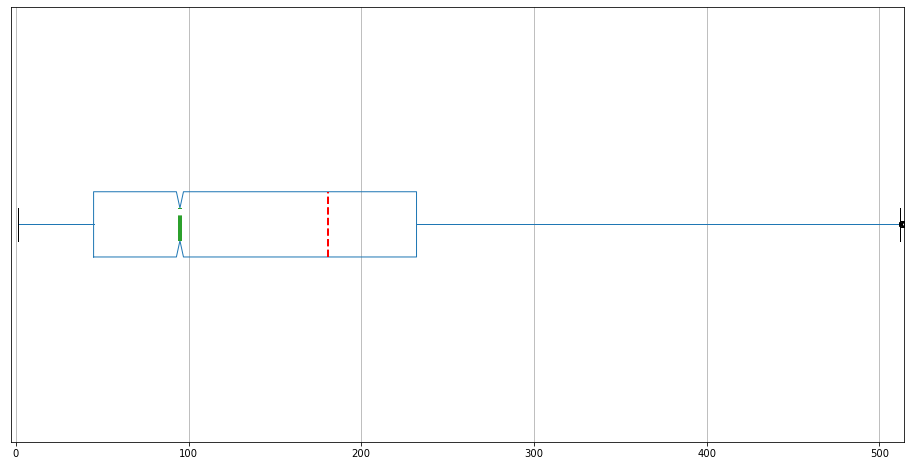

In [716]:
fig, ax = plt.subplots(figsize = (16,8))

meanlineprops = dict(linestyle='--', linewidth = 2.0, color='red') # mean line parameters

medianlineprops = dict(linestyle='-.', linewidth = 4.0, color='green') # median line parameters

data.boxplot(column = 'days_exposition', meanline = True, showmeans = True, vert = False, meanprops = meanlineprops, medianprops = medianlineprops, notch=True)

ax.set_xlim([-3, 514])

plt.gca().yaxis.set_visible(False)

Сроки продажи, которые превышают чуть выше 500 дней, можно считать выбросами.

Взглянем теперь на гистрограмму.

Text(0, 0.5, 'Количество продаж \n')

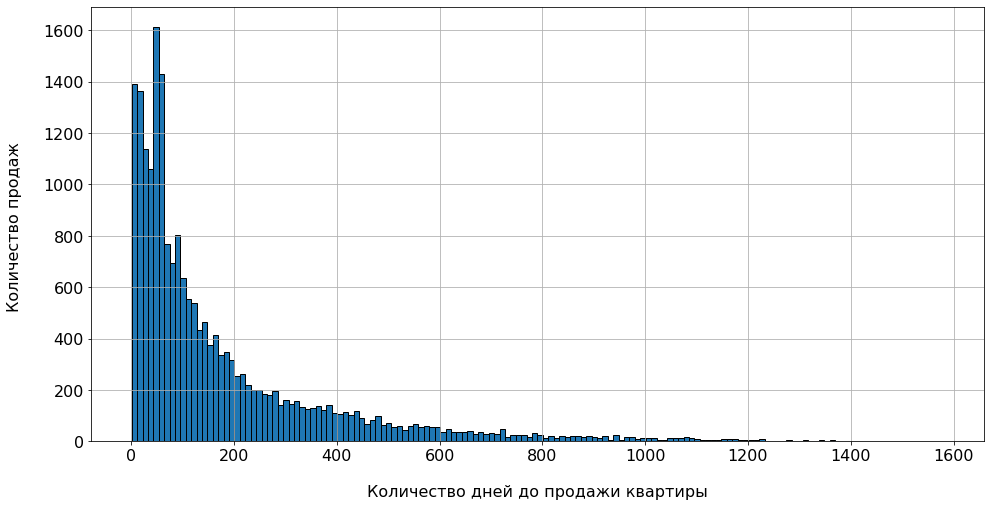

In [250]:
fig, axes = plt.subplots(figsize=(16,8))

data['days_exposition'].plot(kind = 'hist', bins=150, ax = axes, ec='black', fontsize = 16, grid = True)

axes.set_xlabel('\nКоличество дней до продажи квартиры', fontsize = 16)

axes.set_ylabel('Количество продаж \n', fontsize = 16)

#plt.title('Количество \n')

Ограничимся первыми 200 днями.

Text(0, 0.5, 'Количество продаж \n')

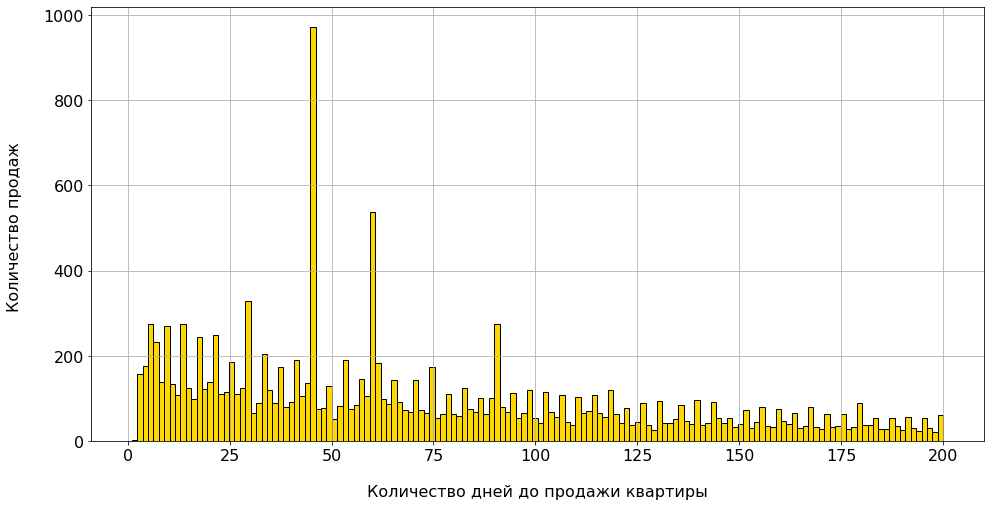

In [670]:
fig, axes = plt.subplots(figsize=(16,8))

data[data['days_exposition'] <= 200]['days_exposition'].plot(kind = 'hist', bins=150, ec='black', color = 'gold', grid = True, fontsize = 16)

axes.set_xlabel('\nКоличество дней до продажи квартиры', fontsize = 16)

axes.set_ylabel('Количество продаж \n', fontsize = 16)

На гистограмме видны три выраженных пика. 

Взглянем на аномалии поближе...

В районе 30-ого, 45-ого, 60-ого и 90-ого дней наблюдаются выраженные пики.

Text(0, 0.5, 'Количество продаж \n')

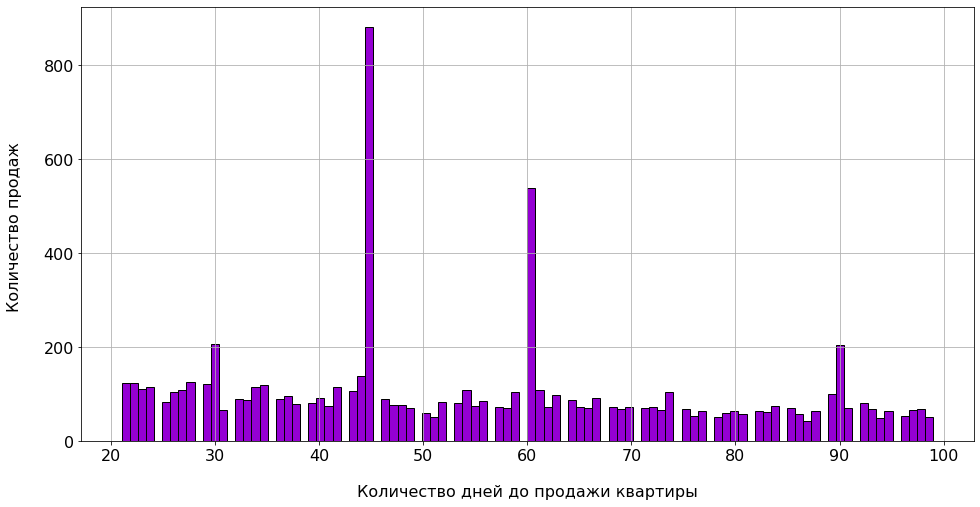

In [256]:
fig, axes = plt.subplots(figsize=(16,8))

data[(data['days_exposition'] > 20) & (data['days_exposition'] < 100)]['days_exposition'].plot(kind = 'hist', bins=100, ec='black', color = 'darkviolet', grid = True, fontsize = 16)

axes.set_xlabel('\nКоличество дней до продажи квартиры', fontsize = 16)

axes.set_ylabel('Количество продаж \n', fontsize = 16)

Такое аномальное поведение, возможно, связано с каким-то автоматическим снятием объявлений с сайта. Поэтому в дальнейшие отчеты данные за 30-ый, 45-ый, 60-ый и 90-ый дни включать не следует для избежания искажений в статистических данных.

<h3>Задача 3. Изучим зависимость цены от числа комнат, этажа, удалённости от центра и даты размещения объявления.<h3> 

<h4>3.1. Какие факторы больше всего влияют на стоимость квартиры? Как зависит ли цена от числа комнат, этажа и удалённости от центра.<h4>

<h5>Изучим зависимость цены квартиры от количества комнат.<h5>

Text(0, 0.5, 'Цена\n (в тыс. рублей)\n')

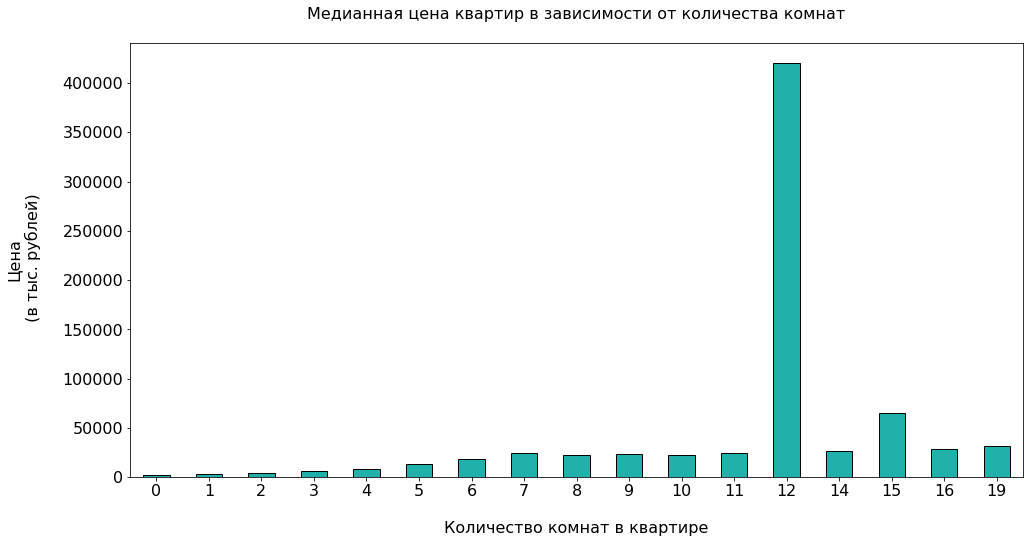

In [237]:
fig, axes = plt.subplots(1, 1, figsize=(14, 7))

data[['rooms', 'price']].groupby(by = 'rooms').median().plot(kind='bar', ec='black',
                                                             
                                                             legend = None, color = 'lightseagreen', fontsize = 14, 
                                                             
                                                             ax = axes, rot = 0)

#plt.gca().xaxis.label.set_visible(False)

plt.title('Медианная цена квартир в зависимости от количества комнат\n', fontsize = 14)

axes.set_xlabel('\nКоличество комнат в квартире', fontsize = 14)

axes.set_ylabel('Цена\n (в тыс. рублей)\n', fontsize = 14)

Отбросим квартиры с количеством комнат более шести.

Text(0.5, 1.0, 'Медианная цена квартир в зависимости от количества комнат\n')

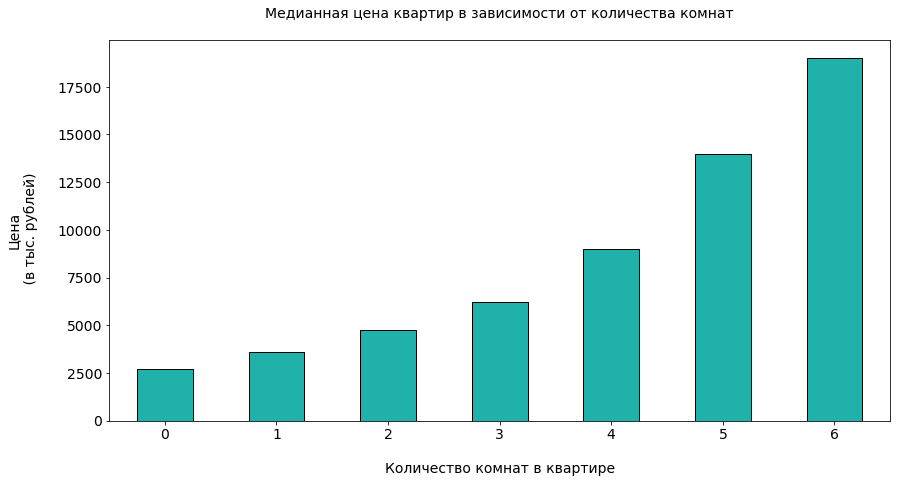

In [362]:
fig, axes = plt.subplots(1, 1, figsize=(14, 7))

data[data['rooms'] <= 6][['rooms', 'price']].groupby(by = 'rooms').median().plot(kind='bar', ec='black', legend = None, 
                                                                                 
                                                                                 rot = 0, color = 'lightseagreen', 
                                                                                 
                                                                                 fontsize = 14, ax = axes)

axes.set_ylabel("Цена\n (в тыс. рублей)\n", fontsize = 14)

axes.set_xlabel("\nКоличество комнат в квартире", fontsize = 14)

plt.title('Медианная цена квартир в зависимости от количества комнат\n', fontsize = 14)

Собственно, ничего удивительного. С росто количества комнат цена на квартиру растет.

<h5>Изучим теперь влияние этажа на цену квартиры.<h5>

In [ ]:
floor_data = data[(data['floor_class'].isnull() == False)][['price', 'floor_class']]

Text(0.5, 1.0, 'Медианная цена квартир в зависимости от этажа\n')

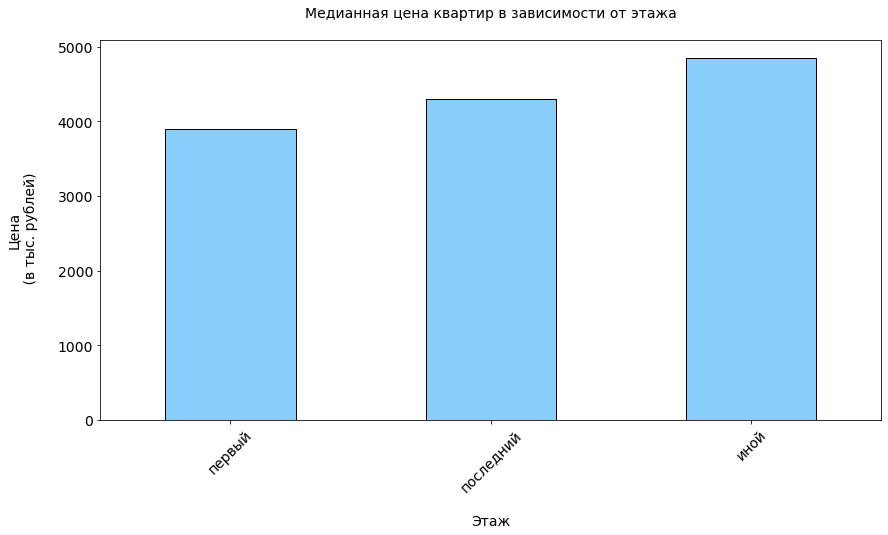

In [602]:
fig, axes = plt.subplots(1, 1, figsize=(14, 7))

floor_data.groupby(by = 'floor_class').median().sort_values(by='price').plot(kind='bar',
                                                                                                 
                                                                                                 ec='black',
                                                                                                 
                                                                                                 legend = None,
                                                                                                 
                                                                                                 color = 'lightskyblue',
                                                                                                 
                                                                                                 ax = axes,
                                                                                                 
                                                                                                 fontsize = 14,
                                                                                                 
                                                                                                 rot = 45)

axes.set_xlabel("\nЭтаж", fontsize = 14)

axes.set_ylabel("Цена\n (в тыс. рублей)\n", fontsize = 14)

plt.title('Медианная цена квартир в зависимости от этажа\n', fontsize = 14)

Квартиры на первом и последних этажах стоят дешевле, при этом квартиры на первом наиболее дешевый вариант.  

<h4>3.2. Исследование зависимости цены кваритры от дня недели, месяца и года.<h4>

<h5>Зависимость цены квартиры от дня недели, в котором было выложено объявление о продаже квартиры.<h5>

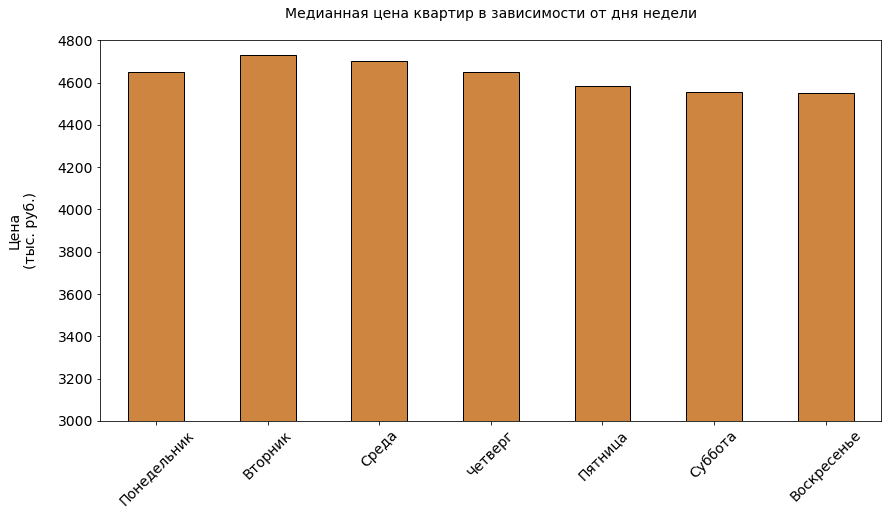

In [633]:
fig, axes = plt.subplots(figsize = (14, 7))

data.groupby( by = 'day_name').median().sort_values(by = 'day_index', ascending=True).plot(y = 'price',kind = 'bar', 
                                                                                           legend = None, rot = 45, 
                                                                                           ax = axes, fontsize = 14, 
                                                                                           
                                                                                           ec = 'black', color = 'peru', ylim = [3000, 4800])

plt.title('Медианная цена квартир в зависимости от дня недели\n', fontsize = 14)

axes.set_ylabel('Цена\n(тыс. руб.)\n', fontsize = 14)

plt.gca().xaxis.label.set_visible(False)

День недели, в который было выложено объявления от продажи, мало влияет на цену квартиры.

<h5>Зависимость цены квартиры от месяца, в котором было выложено объявление о продаже квартиры.<h5>

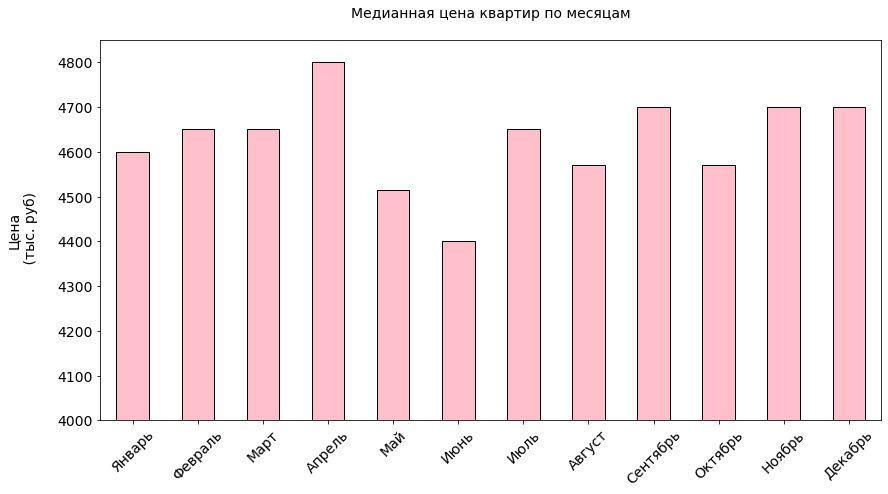

In [641]:
fig, axes = plt.subplots(figsize = (14, 7))

data.groupby( by = 'month_name').median().sort_values(by = 'month_index', ascending=True).plot(y = 'price',  kind = 'bar', legend = None, rot = 45, ec = 'black', fontsize = 14, ax = axes, color = 'pink', ylim = [4000, 4850])

plt.title('Медианная цена квартир по месяцам\n', fontsize = 14)

axes.set_ylabel('Цена\n (тыс. руб)\n', fontsize = 14)

plt.gca().xaxis.label.set_visible(False)

Отметим заметную просадку цены в Июне. Наибольшая цена на квартиры наблюдалась в Апреле. Ценовой размах между указанными месяцами составил 400 тысяч.

В другие месяцы наблюдаются небольшие колебания вокруг медианы (4650 тыс. руб.)

<h5>Зависимость цены квартиры от года, в котором было выложено объявление о продаже квартиры.<h5>

Text(0, 0.5, 'Цена\n (тыс. руб)\n')

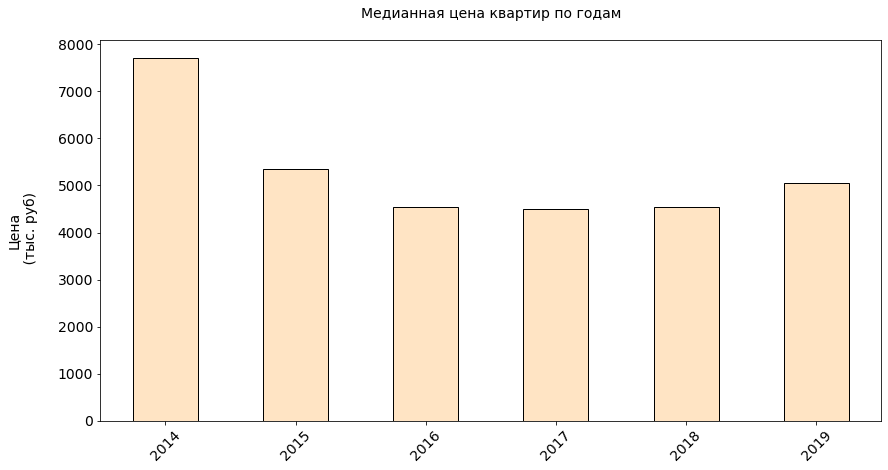

In [637]:
fig, axes = plt.subplots(figsize = (14, 7))

data.groupby( by = 'year').median().sort_values(by = 'year', ascending=True).plot(y = 'price',  kind = 'bar', legend = None, rot = 45, ec = 'black', fontsize = 14, ax = axes, color = 'bisque')

plt.title('Медианная цена квартир по годам\n', fontsize = 14)

plt.gca().xaxis.label.set_visible(False)

axes.set_ylabel('Цена\n (тыс. руб)\n', fontsize = 14)

После 2014 года цены на квариры рухнули.

Text(0, 0.5, 'Цена\n (тыс. руб)\n')

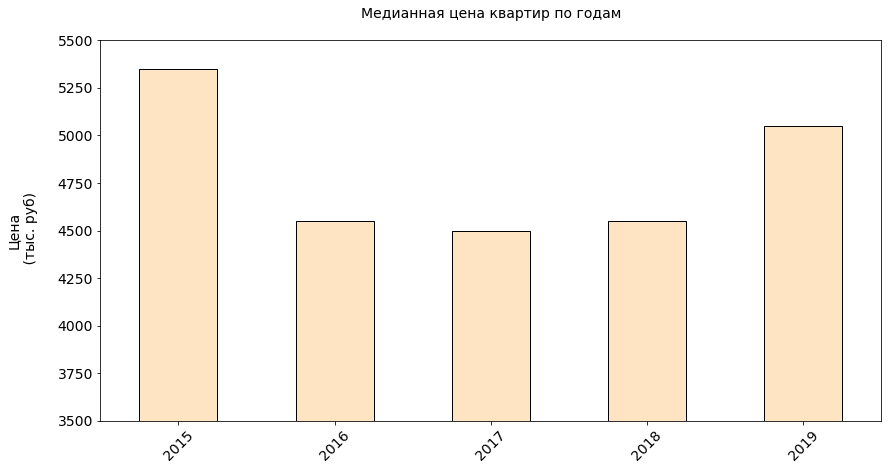

In [644]:
fig, axes = plt.subplots(figsize = (14, 7))

data[data['year'] != 2014].groupby( by = 'year').median().sort_values(by = 'year', ascending=True).plot(y = 'price',  kind = 'bar', legend = None, rot = 45, ec = 'black', fontsize = 14, ax = axes, color = 'bisque', ylim = [3500, 5500])

plt.title('Медианная цена квартир по годам\n', fontsize = 14)

plt.gca().xaxis.label.set_visible(False)

axes.set_ylabel('Цена\n (тыс. руб)\n', fontsize = 14)

Цены продолжили падение до 2018 года (очень медленно ползли вниз), а затем рынок квартир начал демонстировать рост цен.

<h3>Задача №4.<h3> 

<h4> Проанализируем медианную цену квадратного метра в 10 населенных пунктов с наибольшим числом объявлений.<h4>

Сформируем топ 10 населенных пунктов с наибольшим количеством объявлений.

In [259]:
data['locality_name'].value_counts()

Санкт-Петербург          15746
поселок Мурино             556
поселок Шушары             440
Всеволожск                 398
Пушкин                     369
                         ...  
поселок Пчевжа               1
поселок Тесово-4             1
деревня Чудской Бор          1
деревня Большой Сабск        1
деревня Иссад                1
Name: locality_name, Length: 321, dtype: int64

Создадим список из 10 городов с наибольшим количеством объявлений.

In [260]:
top_10_cities = data['locality_name'].value_counts().index[0:10].to_numpy()

На основании данного списка сформируем новый DataFrame для последующего анализа.

In [263]:
top_cities = data[data['locality_name'].isin(top_10_cities)][['locality_name', 'price per square meter']]

Взглянем на получившийся DataFrame.

In [265]:
top_cities.head(7)

,locality_name,price per square meter
0,Санкт-Петербург,120370.4
1,поселок Шушары,82920.8
2,Санкт-Петербург,92785.7
3,Санкт-Петербург,408176.1
4,Санкт-Петербург,100000.0
6,поселок Парголово,99195.7
7,Санкт-Петербург,110544.7


In [266]:
agg_top_cities = top_cities.groupby(by = 'locality_name').median().sort_values(by='price per square meter', ascending=True)

Text(0.5, 0, '\nНаселенный пункт')

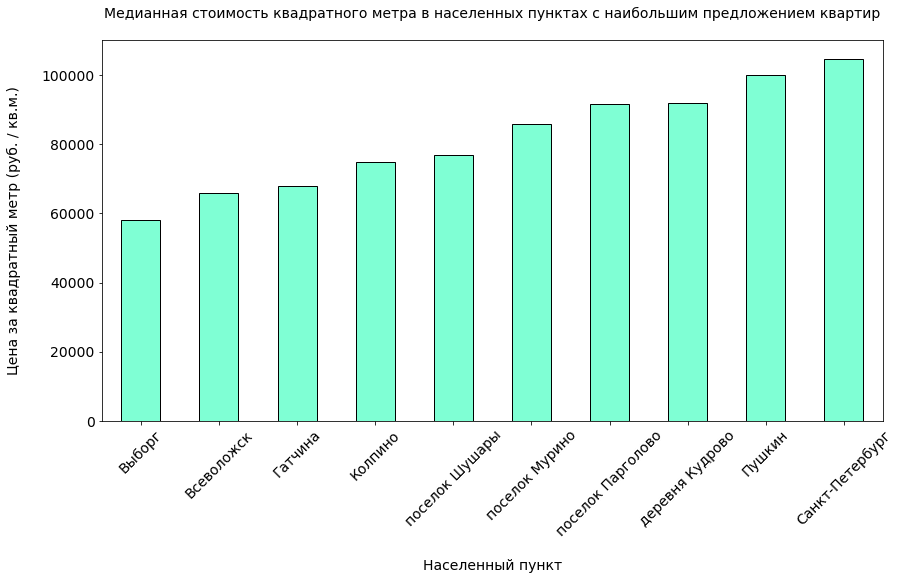

In [364]:
fig, axes = plt.subplots(figsize = (14, 7))

agg_top_cities['price per square meter'].plot(kind = 'bar', ec = 'black', legend = None, 
                                              
                                              fontsize = 14, color = 'aquamarine', rot = 45)

plt.title('Медианная стоимость квадратного метра в населенных пунктах с наибольшим предложением квартир\n', fontsize = 14)

axes.set_ylabel('Цена за квадратный метр (руб. / кв.м.)\n', fontsize = 14)

axes.set_xlabel('\nНаселенный пункт', fontsize = 14)

<h3>Задача №5.<h3>

Изучим предложения квартир в Санкт-Петербурге. Для каждой квартиры есть информация о расстоянии до центра. Задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он будет показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [26]:
peterburg_data = data[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest_km'].isnull() == False)][['price', 'cityCenters_nearest_km']]

In [27]:
peterburg_data['cityCenters_nearest_km'].isnull().sum()

0

In [28]:
peterburg_data.head(10)

,price,cityCenters_nearest_km
0,13000.0,16.0
2,5196.0,14.0
3,64900.0,7.0
4,10000.0,8.0
7,7915.0,12.0
9,5400.0,15.0
10,5050.0,14.0
15,4650.0,14.0
16,6700.0,11.0
17,4180.0,15.0


Text(0, 0.5, 'Цена\n(в тыс. руб.)\n')

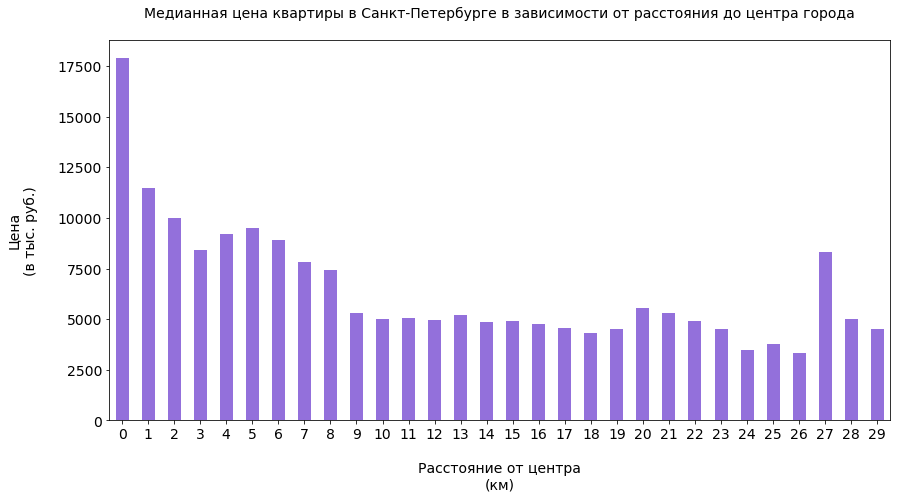

In [365]:
fig, axes = plt.subplots(figsize = (14, 7))

peterburg_data.groupby(by = 'cityCenters_nearest_km').median()[['price']].plot(kind = 'bar', legend = None, 
                                                                               
                                                                               rot = 0, ax = axes, fontsize = 14, 
                                                                               
                                                                               color = 'mediumpurple')

plt.title('Медианная цена квартиры в Санкт-Петербурге в зависимости от расстояния до центра города\n', fontsize = 14)

axes.set_xlabel('\nРасстояние от центра\n(км)', fontsize = 14)

axes.set_ylabel('Цена\n(в тыс. руб.)\n', fontsize = 14)

Видим резкий скачок цены в районе 8 - 9 км. Значит, за центр Петербурга можно считать все, что ближе 8 км от центра.

Можно наблюдать интересные "всплески" цен после 20 км, после 25 км и после 27 км от центра Петербурга. Сложно сказать с чем это связано...

<h3> Задача №6.<h3>

<h4>6.1. Выделим сегмент квартир в центральной зоне Петербурга (до 8 км включительно) и проанализируем эту территорию.<h4>

Изучим зависимость цены квартир от следующих параметров:

+ число комнат,
+ высота потолков,
+ площадь.

<h5>Зависимость цены квартиры от числа комнат в центральных районах Петербурга.<h5>

In [371]:
center_peterburg_data = data[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest_km'] <= 8)][['price', 'rooms', 'total_area', 'floor_class', 'day_index', 'day_name', 'month_index', 'month_name', 'year']]

Text(0, 0.5, 'Цена\n(тыс. руб.)\n')

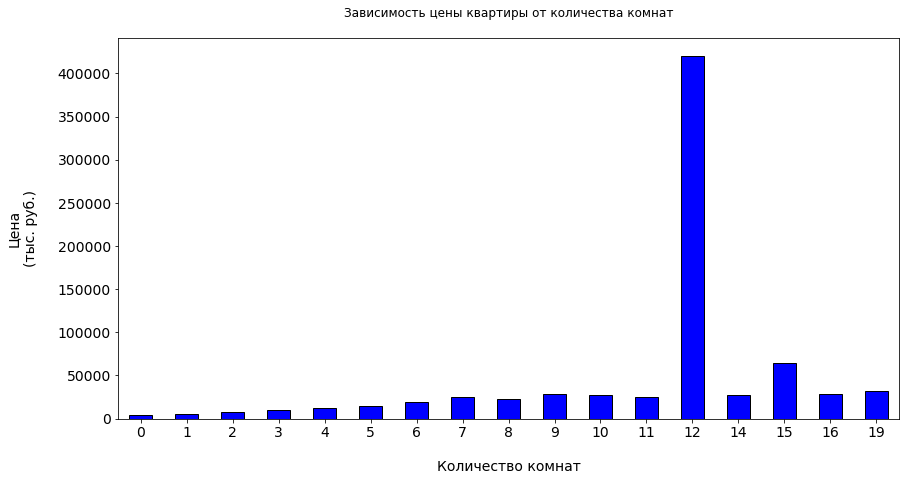

In [372]:
fig, axes = plt.subplots(figsize=(14, 7))

center_peterburg_data.groupby(by = 'rooms').median()['price'].plot(kind = 'bar', legend = None, ax = axes, 
                                                                   rot = 0, ec = 'black', color = 'blue', fontsize = 14,
                                                                   title = 'Зависимость цены квартиры от количества комнат\n')

axes.set_xlabel("\nКоличество комнат", fontsize = 14)

axes.set_ylabel("Цена\n(тыс. руб.)\n", fontsize = 14)

Ограничимся рассмотрением квартир с шестью комнатами включительно. 

Text(0, 0.5, 'Цена\n(тыс. руб.)\n')

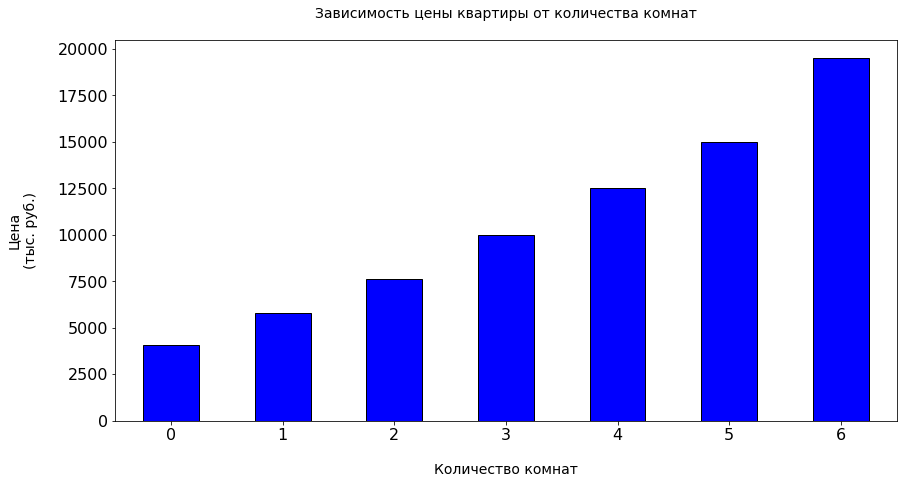

In [111]:
fig, axes = plt.subplots(figsize=(14, 7))

center_peterburg_data[center_peterburg_data['rooms'] <= 6].groupby(by = 'rooms').median()['price'].plot(kind = 'bar', 
                                                                                                        legend = None, 
                                                                                                        ax = axes,
                                                                                                        rot = 0,  
                                                                                                        ec = 'black', 
                                                                                                        color = 'blue', 
                                                                                                        fontsize = 16)

plt.title('Зависимость цены квартиры от количества комнат\n', fontsize = 14)

axes.set_xlabel("\nКоличество комнат", fontsize = 14)

axes.set_ylabel("Цена\n(тыс. руб.)\n", fontsize = 14)

Как и предполагалось, чем больше комнат, тем выше цена.

In [157]:
#fig = px.bar(center_peterburg_data[center_peterburg_data['rooms'] <= 6].groupby(by = 'rooms').median(), x = center_peterburg_data[center_peterburg_data['rooms'] <= 6].groupby(by = 'rooms').median().index, y = 'price', title = 'Зависимость цены квартиры от количества комнат', labels = {'price' : "Цена\n(тыс. руб.)\n", 'x': "\nКоличество комнат"})

fig = px.bar(center_peterburg_data[center_peterburg_data['rooms'] <= 6].groupby(by = 'rooms').median(), x = center_peterburg_data[center_peterburg_data['rooms'] <= 6].groupby(by = 'rooms').median().index, y = 'price', labels = {'price' : "Цена\n(тыс. руб.)\n", 'x': "\nКоличество комнат"}, color = 'red')

fig.update_layout(
    title={
        'text': 'Зависимость цены квартиры от количества комнат',
        'y':0.95,
        'x':0.5}, title_font_size = 20,  plot_bgcolor='white', title_font_family="Arial", yaxis = dict(
tickfont = dict(size=14)), xaxis = dict(tickfont = dict(size=14)))

fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='white')

fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='white')

fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['price', 'total_area', 'day_index', 'month_index', 'year'] but received: red

<h5>Изучим зависимость цены квартиры от ее этажа в центральных районах Петербурга.<h5>

Отберем из DataFrame квартиры, у которых известен ее этаж, а также указана общая этажность дома.

In [385]:
floor_center_peterburg_data = center_peterburg_data[(center_peterburg_data['floor_class'].isnull() == False)][['price', 'floor_class']]

Чекнем все ли правильно отобралось...

In [563]:
floor_center_peterburg_data['floor_class'].isnull().sum()

0

Все ОК. Двигаемся дальше.

Визуализируем.

Text(0, 0.5, 'Цена\n (тыс.руб.)\n')

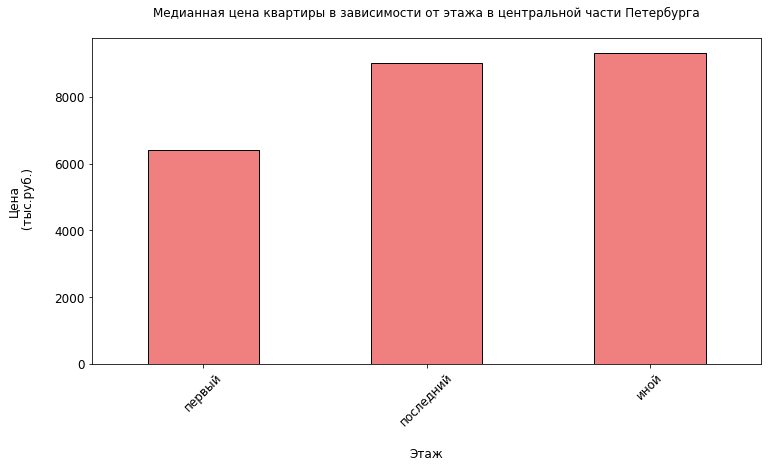

In [432]:
fig, axes = plt.subplots(figsize = (12, 6))

floor_center_peterburg_data[['floor_class', 'price']].groupby(by = 'floor_class').median()['price'].sort_values(ascending=True).plot(kind = 'bar',  rot = 45,legend = None, fontsize = 12, color = 'lightcoral', ec = 'black')

plt.title('Медианная цена квартиры в зависимости от этажа в центральной части Петербурга\n', fontsize = 12)

axes.set_xlabel('\nЭтаж', fontsize = 12)

axes.set_ylabel('Цена\n (тыс.руб.)\n', fontsize = 12)

Квартиры на первом этаже стоят прилично дешевле. Цена же квартиры на последнем этаже чуть ниже, чем цена квартиры на других этажах.

<h5>Взглянем на медианную цену квартиры в зависимости от даты размещения объявления (день недели, месяц, год).<h5>

<h5>Зависимость цены квартиры в центре Петербурга от дня недели, в котором было выложено объявление о продаже квартиры.<h5>

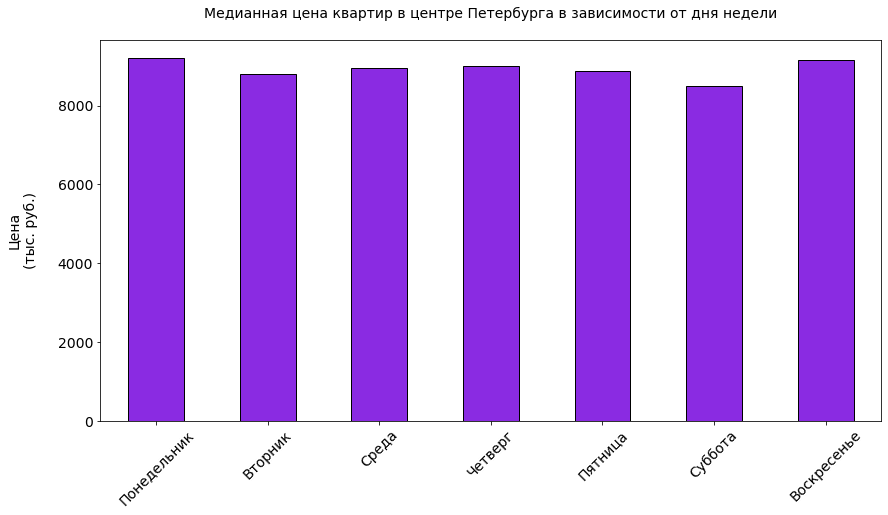

In [603]:
fig, axes = plt.subplots(figsize = (14, 7))

center_peterburg_data.groupby( by = 'day_name').median().sort_values(by = 'day_index', ascending=True).plot(y = 'price',  
                                                                                                                kind = 'bar', 
                                                                                                                legend = None,
                                                                                                                rot = 45, 
                                                                                                                ax = axes, 
                                                                                                                fontsize = 14, 
                                                                                                                ec = 'black', 
                                                                                                                color = 'blueviolet')

plt.title('Медианная цена квартир в центре Петербурга в зависимости от дня недели\n', fontsize = 14)

axes.set_ylabel('Цена\n(тыс. руб.)\n', fontsize = 14)

plt.gca().xaxis.label.set_visible(False)

Цена квартиры при продаже не зависит от дня недели.

<h5>Зависимость цены квартиры в центре Петербурга от месяца, в котором было выложено объявление о продаже квартиры.<h5>

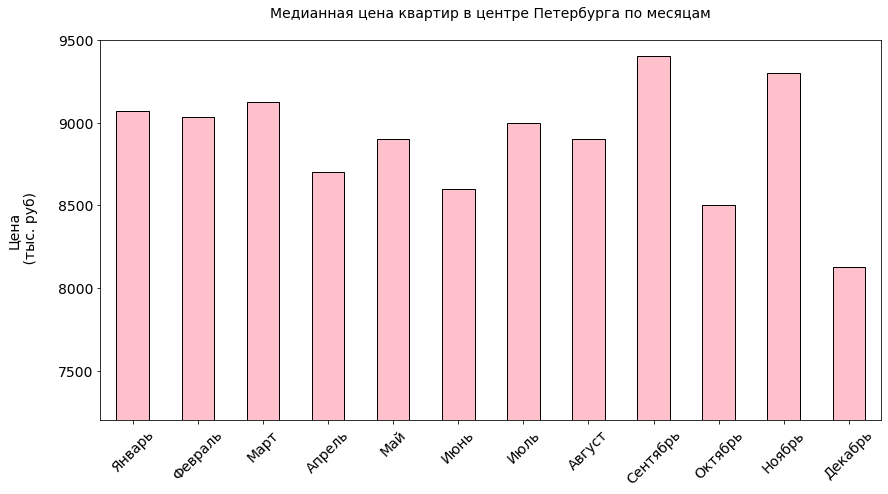

In [623]:
fig, axes = plt.subplots(figsize = (14, 7))

center_peterburg_data.groupby( by = 'month_name').median().sort_values(by = 'month_index', ascending=True).plot(y = 'price',  kind = 'bar', legend = None, rot = 45, ec = 'black', fontsize = 14, ax = axes, color = 'pink', ylim = [7200, 9500])

plt.title('Медианная цена квартир в центре Петербурга по месяцам\n', fontsize = 14)

axes.set_ylabel('Цена\n (тыс. руб)\n', fontsize = 14)

plt.gca().xaxis.label.set_visible(False)

Видим довольно существенную просадку в декабре. В сентябре цены оказались наиболее высокими: можно предположить, что родители покупают своим чадам квартиры при обучении последних в ВУЗах. Также наблюдаются небольшие провалы в Апреле, Июне и Октябре. 

<h5>Зависимость цены квартиры в центре Петербурга от года, в котором было выложено объявление о продаже квартиры.<h5>

Text(0, 0.5, 'Цена\n (тыс. руб)\n')

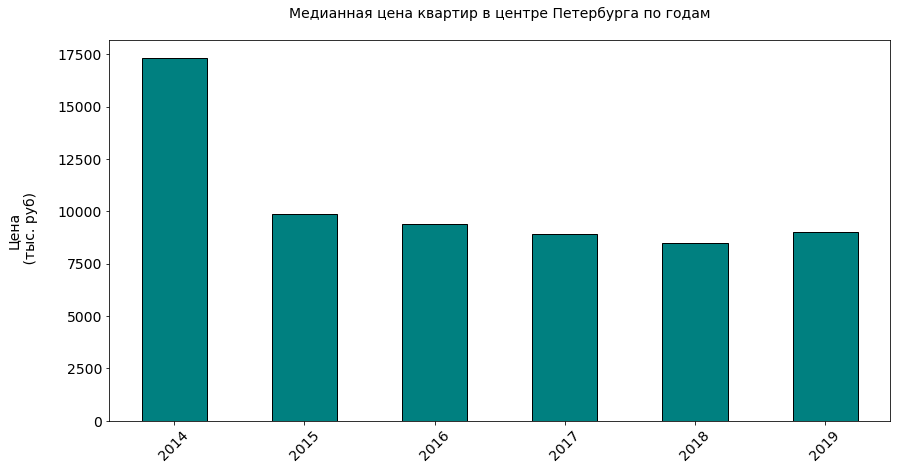

In [531]:
fig, axes = plt.subplots(figsize = (14, 7))

center_peterburg_data.groupby( by = 'year').median().sort_values(by = 'year', ascending=True).plot(y = 'price',  kind = 'bar', legend = None, rot = 45, ec = 'black', fontsize = 14, ax = axes, color = 'teal')

plt.title('Медианная цена квартир в центре Петербурга по годам\n', fontsize = 14)

plt.gca().xaxis.label.set_visible(False)

axes.set_ylabel('Цена\n (тыс. руб)\n', fontsize = 14)

После 2014 года наблюдается существенное уменьшение медианной цены квартиры. Скорей всего, это связано с экономическим кризисом 2014 года, разразившимся во всем мире.

Детальнее взглянем на последующие года (после 2014 года).

Text(0, 0.5, 'Цена\n (тыс. руб)\n')

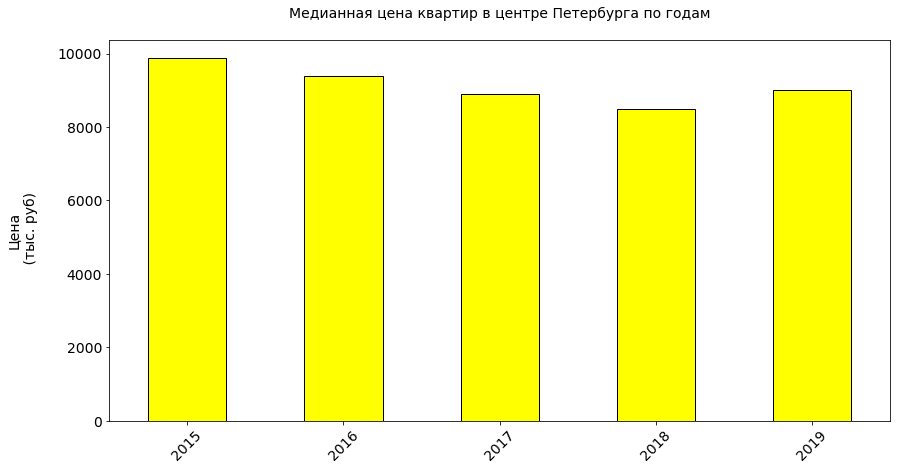

In [593]:
fig, axes = plt.subplots(figsize = (14, 7))

center_peterburg_data[center_peterburg_data['year'] != 2014].groupby( by = 'year').median().sort_values(by = 'year', ascending=True).plot(y = 'price',  kind = 'bar', legend = None, rot = 45, ec = 'black', fontsize = 14, ax = axes, color = 'yellow')

plt.title('Медианная цена квартир в центре Петербурга по годам\n', fontsize = 14)

plt.gca().xaxis.label.set_visible(False)

axes.set_ylabel('Цена\n (тыс. руб)\n', fontsize = 14)

После обвала на рынке недвижимости в 2014 году цены на квартиры продолжили медленное падение. И только в 2019 году цены вперые перешли к росту.

<h1> Выводы.<h1>

Ответим на вопросы "Отличаются ли выводы по центру Петербурга от общих выводов по всему городу?" и "Как между собой отличаются выводы о зависимости цен от разных факторов по центру Петербурга, по Петербургу и по Петербургу и области?".

Для наглядности построим необходимые графики для Санкт-Петербурга и области, отдельно для города Санкт-Петербурга и отдельно для его центральной зоны.

Создадим отдельный DataFrame для Петербурга.

In [374]:
peterburg_data = data[(data['locality_name'] == 'Санкт-Петербург') == True][['price', 'rooms', 'ceiling_height', 'total_area', 'floor_class', 'day_index', 'day_name', 'month_index', 'month_name', 'year']]

<h5>Изучим зависимость цены кварти в центре Петербурга, в Петербурге и в Петербурге и областир от числа комнат.<h5>

Сразу ограничим число комнат до 6 включительно.

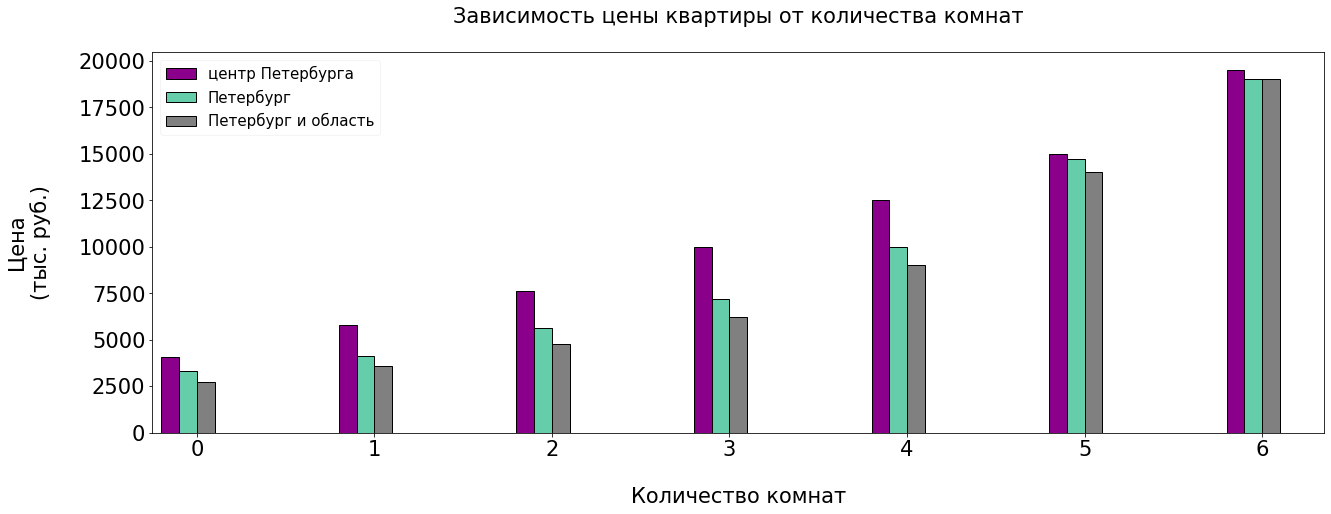

In [581]:
fig, axes = plt.subplots(figsize=(21, 7))

center_peterburg_data[center_peterburg_data['rooms'] <= 6].groupby(by = 'rooms').median()['price'].plot(kind = 'bar', 
                                                                                                        legend = None, 
                                                                                                        ax = axes,
                                                                                                        rot = 0,  
                                                                                                        ec = 'black', 
                                                                                                        color = 'darkmagenta', 
                                                                                                        fontsize = 21,
                                                                                                        width=0.1, position=2, 
                                                                                                        label = 'центр Петербурга')

peterburg_data[peterburg_data['rooms'] <= 6].groupby(by = 'rooms').median()['price'].plot(kind = 'bar', legend = None,
                                                                                          ax = axes, rot = 0, ec = 'black', 
                                                                                          color = 'mediumaquamarine',
                                                                                          fontsize = 21,
                                                                                          width=0.1, position=1,
                                                                                          label = 'Петербург')

data[data['rooms'] <= 6].groupby(by = 'rooms').median()['price'].plot(kind = 'bar', legend = None, ax = axes,
                                                                      rot = 0, ec = 'black', color = 'grey',
                                                                      fontsize = 21, width=0.1, position=0,
                                                                      label = 'Петербург и область')

plt.title('Зависимость цены квартиры от количества комнат\n', fontsize = 21)

axes.set_xlabel("\nКоличество комнат", fontsize = 21)

axes.set_ylabel("Цена\n(тыс. руб.)\n", fontsize = 21)

axes.legend(loc=2, framealpha=0.2, fontsize = 15)

Ожидаемо, что с ростом количества комнат в квартире растёт и цена на неё. Цены выше всего в центре Петербурга, существенно ниже в пределах Петербурга, и несколько дешевле в области, чем в городе. Интересно, что квартиры с пятью и шестью комнатами мало отличаются в цене в центре Петербурга, в Петербурге и в Петербурге и области.

<h5>Изучим зависимость цены квартиры в в центре Петербурга, в Петербурге и в Петербурге и области от этажа квартиры.<h5>

In [568]:
floor_peterburg_data = peterburg_data[(peterburg_data['floor_class'].isnull() == False)][['price', 'floor_class']]

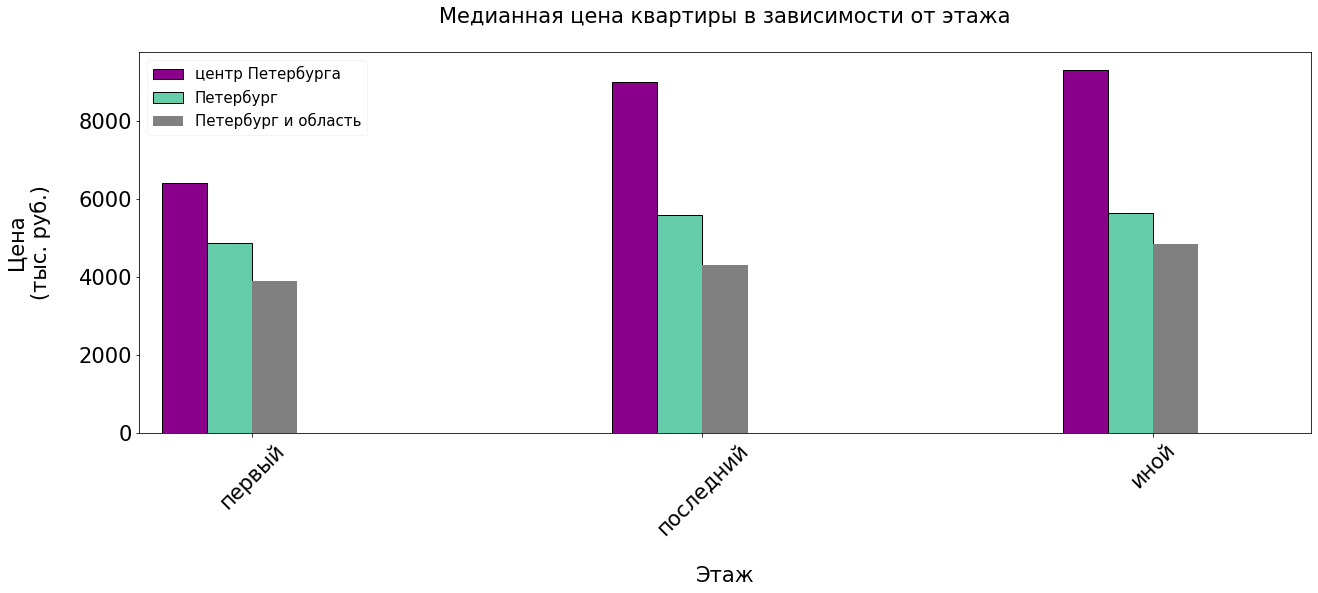

In [582]:
fig, axes = plt.subplots(figsize=(21,7))

floor_center_peterburg_data.groupby(by = 'floor_class').median()['price'].sort_values(ascending=True).plot(kind = 'bar',  rot = 45,legend = None, fontsize = 21, color = 'darkmagenta', ec = 'black', width=0.1, position=2, label = 'центр Петербурга')

floor_peterburg_data.groupby(by = 'floor_class').median()['price'].sort_values(ascending=True).plot(kind = 'bar',  rot = 45,legend = None, fontsize = 21, color = 'mediumaquamarine', ec = 'black', width=0.1, position=1, label = 'Петербург')

floor_data.groupby( by = 'floor_class').median()['price'].sort_values(ascending=True).plot(kind = 'bar', legend = None, rot = 45, ax=axes, color = 'grey', width=0.1, position= 0, label = 'Петербург и область', fontsize = 21)

axes.set_xlabel('\nЭтаж', fontsize = 21)

axes.set_ylabel('Цена\n(тыс. руб.)\n', fontsize = 21)

plt.title('Медианная цена квартиры в зависимости от этажа\n', fontsize = 21)

axes.legend(loc=2, framealpha=0.2, fontsize = 15)  #blueviolet

На первом этаже квартиры дешевле вне завимости от географического положения квартиры. Квартиры на последних этажах чуть дешевле, чем на других, а ее цена также не зависит от географии.

<h5>Посмотрим на гистограммы цен квартир в центре Петербурга, в Петербурге и в Петербурге и области в зависимости от даты размещения объявления (день недели, месяц, год).<h5>

<h5>Зависимость цены квартиры от дня недели, в котором было выложено объявление о продаже квартиры.<h5>

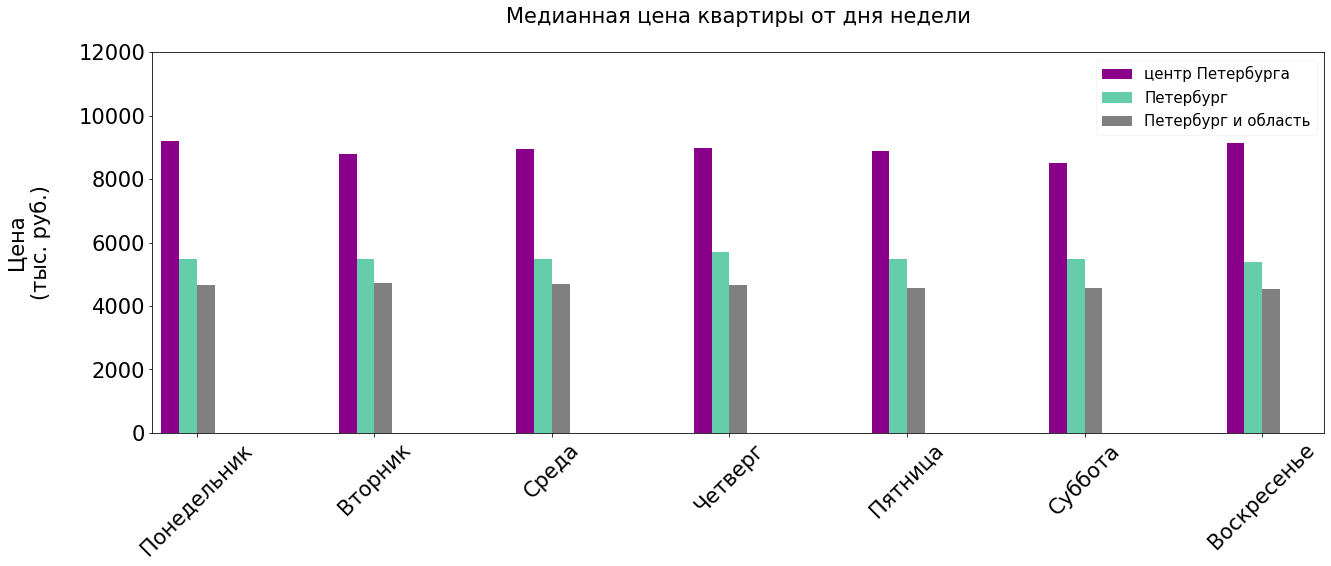

In [532]:
fig, axes = plt.subplots(figsize=(21,7))

center_peterburg_data.groupby( by = 'day_name').median().sort_values(by = 'day_index', ascending=True).plot(y = 'price',  kind = 'bar', legend = None, rot = 45, ax=axes, color = 'darkmagenta',  width=0.1, position=2, label = 'центр Петербурга', ylim=[0, 12000], fontsize = 21)

peterburg_data.groupby( by = 'day_name').median().sort_values(by = 'day_index', ascending=True).plot(y = 'price',  kind = 'bar', legend = None, rot = 45, ax=axes, color = 'mediumaquamarine', width=0.1, position=1, label = 'Петербург', fontsize = 21)

data.groupby( by = 'day_name').median().sort_values(by = 'day_index', ascending=True).plot(y = 'price',  kind = 'bar', legend = None, rot = 45, ax=axes, color = 'grey', width=0.1, position= 0, label = 'Петербург и область', fontsize = 21)

axes.set_ylabel('Цена\n(тыс. руб.)\n', fontsize = 21)

axes.legend(loc=1, framealpha=0.2, fontsize = 15)  #blueviolet

plt.title('Медианная цена квартиры от дня недели\n', fontsize = 21)

plt.gca().xaxis.label.set_visible(False)

Как и в случае с центром Петербурга, влияние даты размещения объявления мало влияет на цену квартиры.

<h5>Зависимость цены квартиры от месяца, в котором было выложено объявление о продаже квартиры.<h5>

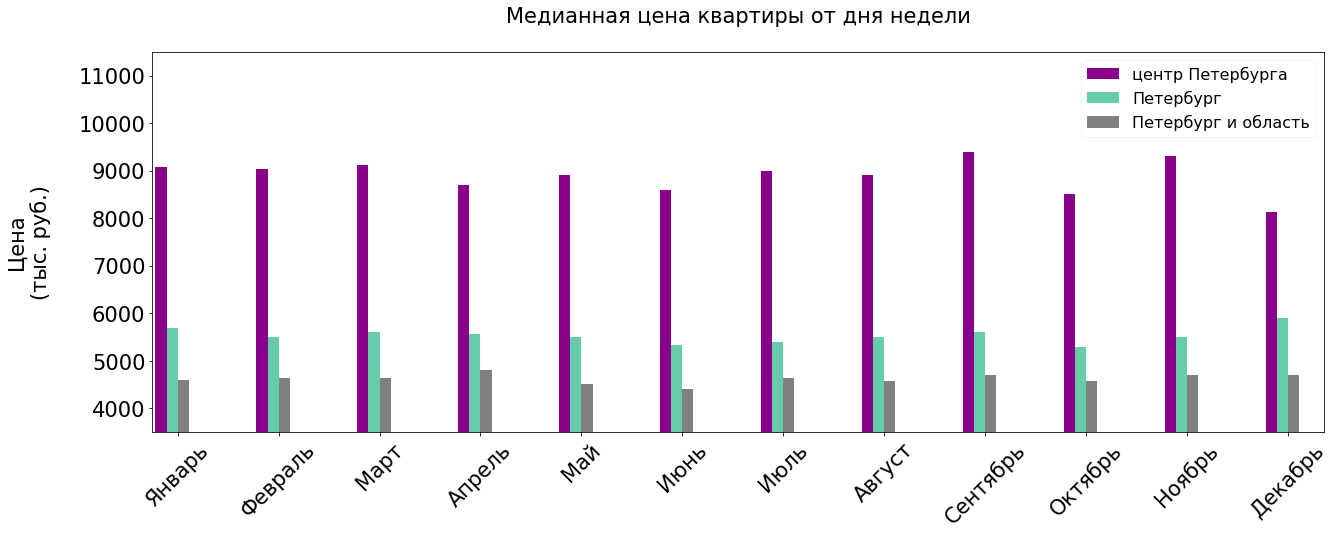

In [375]:
fig, axes = plt.subplots(figsize=(21,7))

center_peterburg_data.groupby( by = 'month_name').median().sort_values(by = 'month_index', ascending=True).plot(y = 'price',  kind = 'bar', legend = None, rot = 45, ax=axes, color = 'darkmagenta', width=0.11, position=2, label = 'центр Петербурга', ylim=[3500, 11500], fontsize = 21)

peterburg_data.groupby( by = 'month_name').median().sort_values(by = 'month_index', ascending=True).plot(y = 'price',  kind = 'bar', legend = None, rot = 45, ax=axes, color = 'mediumaquamarine', width=0.11, position=1, label = 'Петербург', fontsize = 21)

data.groupby( by = 'month_name').median().sort_values(by = 'month_index', ascending=True).plot(y = 'price',  kind = 'bar', legend = None, rot = 45, ax=axes, color = 'grey', width=0.11, position=0, label = 'Петербург и область', fontsize = 21)

axes.set_ylabel('Цена\n(тыс. руб.)\n', fontsize = 21)

axes.legend(loc=1, framealpha=0.2, fontsize = 16)  #blueviolet

plt.title('Медианная цена квартиры от дня недели\n', fontsize = 21)

plt.gca().xaxis.label.set_visible(False)

Медианная цена квартиры в Декабре довольно неплохо упала в центре Петербурга, однако, в целом по Петербургу цена хорошо подросла. Апреле, Июне и Октябре

В целом по Петербургу наблюдаются небольшие провалы в Апреле, Июне и Октябре. В Петербурге и области цены существенно "проваливаются" в Июне, виден небольшой провал в Мае.

Отмечу, что цены на жилье, по какой-то причине, проседают в Октябре, а в Сентябре наоборот высоки вне зависимости от "географии" квартиры. Как уже отмечалось, возможно это связано с ростом спроса на квартиры со стороны обучающиехся в ВУЗах и их родителей. В Октябре же наблюдается откат. Также довольно низкие цены в Мае и Июне (люди разъезжаются по дачам).

<h5>Зависимость цены квартиры от года, в котором было выложено объявление о продаже квартиры.<h5>

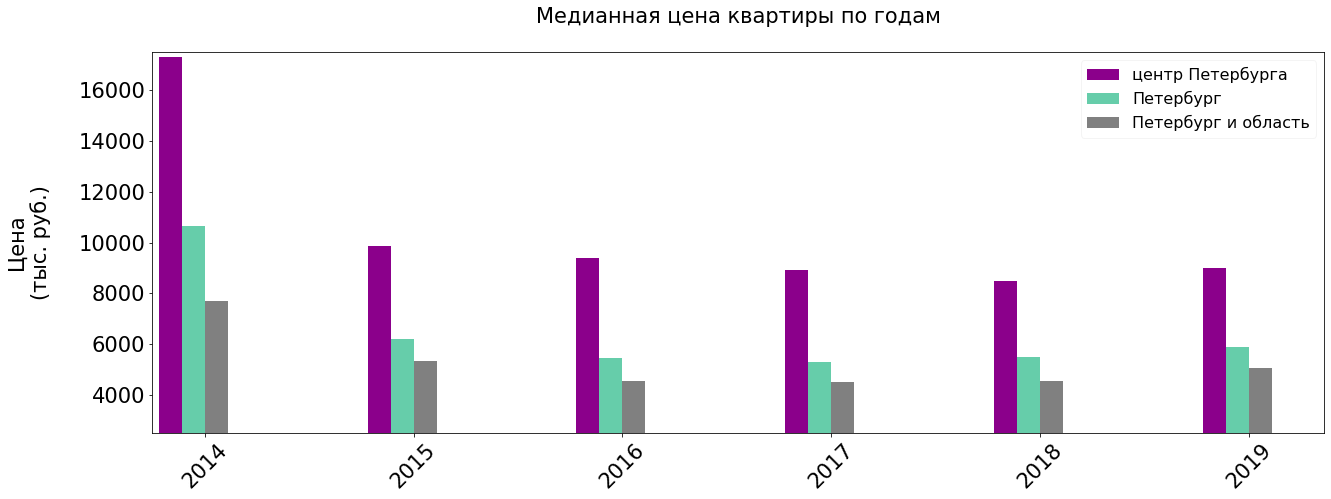

In [376]:
fig, axes = plt.subplots(figsize=(21,7))

center_peterburg_data.groupby( by = 'year').median().sort_values(by = 'year', ascending=True).plot(y = 'price',  kind = 'bar', legend = None, rot = 45, ax=axes, color = 'darkmagenta', width=0.11, position=2, label = 'центр Петербурга', fontsize = 21, ylim = [2500, 17500])

peterburg_data.groupby( by = 'year').median().sort_values(by = 'year', ascending=True).plot(y = 'price',  kind = 'bar', legend = None, rot = 45, ax=axes, color = 'mediumaquamarine', width=0.11, position=1, label = 'Петербург', fontsize = 21)

data.groupby( by = 'year').median().sort_values(by = 'year', ascending=True).plot(y = 'price',  kind = 'bar', legend = None, rot = 45, ax=axes, color = 'grey', width=0.11, position=0, label = 'Петербург и область', fontsize = 21)

axes.set_ylabel('Цена\n(тыс. руб.)\n', fontsize = 21)

axes.legend(loc=1, framealpha=0.2, fontsize = 16)  #blueviolet

plt.title('Медианная цена квартиры по годам\n', fontsize = 21)

plt.gca().xaxis.label.set_visible(False)

Обвал цен на квартиры в 2014 году происходил независимо "географии" квартиры. В период 2015 - 2017 гг. происходит дальнейшее небольшое снижение. В 2018 году наметился тренд на перелом этой ситуации: цены по Петербургу в целом и по Петербургу и области подрости, в центре - небольшое падаение. Только в 2019 году цены начали уверенно поползли вверх во всех исследуемых локациях.

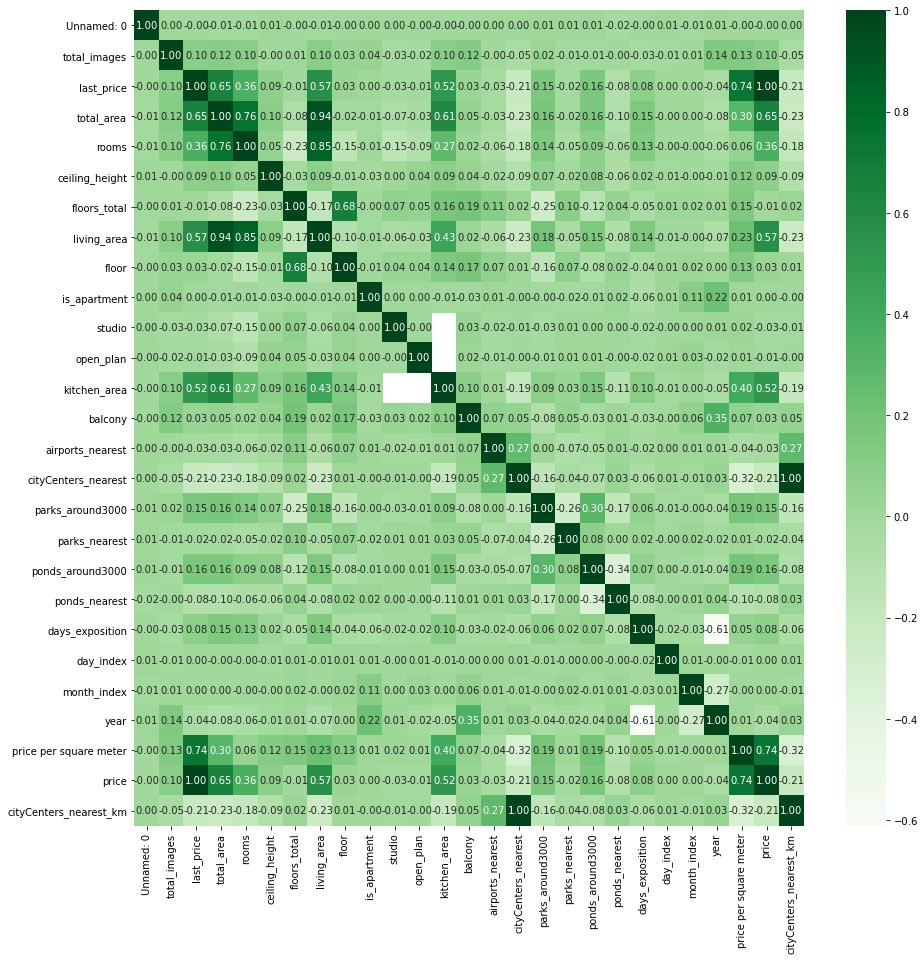

In [886]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="Greens", fmt='.2f')

Из данных выше, мы можем сказать, что сильнее всего цена на квартиру зависит от цены за квадратный метр (практически очевидно), от общей площади квартиры (чем больше площадь, тем выше цена) и количества комнат. Также влияние оказывает удаленность от центра - чем дальше от центра, тем ниже цена. Небольшое влияние оказывает присутствие парков/водоемов рядом.
Таким же образом на цену влияет удаленность от аэропорта.
Многие из этих параметров оказывают довольно слабое влияние, но если попробовать их объединить в одну группу, то, наверняка, можно будет построить хорошую предсказательную модель.